In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

In [18]:
def get_data():
    load_path = 'C:/Users/Gagampy/YandexDisk/YandexDisk/Nauch_Rabota/Spiro/Database_csv/'
    load_packages = ['Record_1_features/',
                     #'Record_3_features/',
                     'Record_4_features/',
                     'Record_6_features/',
                     'Record_7_features/',
                     #'Record_8_features/'
                    ]
    patient_indexes = np.array([-1])
    for package_index, package in enumerate(load_packages):
        df = pd.read_csv(load_path + package + 'features_df.csv')
        if package_index > 0:
            df_old = pd.concat([df_old, df], axis=0, ignore_index=True, sort=False)
        else:
            df_old = df
        patient_indexes = np.append(patient_indexes, df_old.index[-1])
    patient_indexes = np.delete(patient_indexes, -1)
    patient_indexes += 1
    return df_old, patient_indexes

df_, pat_indexes = get_data()
df_.tail()

,Spiro_iBeg,Spiro_iEnd,Spiro_obstr_len,Spo_iMax,Spo_iMin,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Prev_spiro_peak_coord,Prev_spiro_min_coord
1413,383010,383435,425,383337,383651,99.29,2862.7,-1618.3,382902,382918
1414,383565,384000,435,383891,384243,99.64,3999.6,-1507.7,383464,383506
1415,385335,385695,360,385626,386124,92.54,4638.3,-1641.7,385239,385253
1416,386330,386740,410,386606,387119,94.02,3459.4,-1273.8,386237,386220
1417,387425,387780,355,387464,387804,50.74,2972.7,-1472.6,387372,387316


In [19]:
pat_indexes

array([  0, 296, 578, 811])

### Feature Engineering

In [20]:
df_['Spiro_peak_to_next_iBeg'] = df_['Spiro_iBeg'] - df_['Prev_spiro_peak_coord'] 
df_['Spiro_peak_to_next_iEnd'] = df_['Spiro_iEnd'] - df_['Prev_spiro_peak_coord']
df_['Peak_range'] = df_['Spiro_peak_ampl'] + df_['Spiro_min_ampl'].abs()

df_.head()

,Spiro_iBeg,Spiro_iEnd,Spiro_obstr_len,Spo_iMax,Spo_iMin,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Prev_spiro_peak_coord,Prev_spiro_min_coord,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range
0,13715,14056,341,13836,14828,134.92,611.34,-1679.3,13550,13568,165,506,2290.64
1,15327,15713,386,15499,15970,122.31,1567.00,-1791.6,15239,15214,88,474,3358.60
2,17017,17448,431,17212,17683,149.60,1423.40,-2492.3,16941,16902,76,507,3915.70
3,17676,17970,294,17814,18720,146.11,2333.50,-2936.6,17540,17513,136,430,5270.10
4,18651,19164,513,18852,19357,120.89,1641.50,-2514.5,18564,18495,87,600,4156.00


In [21]:
def drop_unnecessary_features(df, ftd):
    df.drop(to_drop, axis=1, inplace=True)
    return df

to_drop = ['Spiro_iBeg', 'Spiro_iEnd', 'Prev_spiro_peak_coord',
          'Prev_spiro_min_coord', 'Spo_iMax', 'Spo_iMin']
df = drop_unnecessary_features(df_, to_drop)
df.Spo_decr = df.Spo_decr / 10
df.head()

,Spiro_obstr_len,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range
0,341,13.492,611.34,-1679.3,165,506,2290.64
1,386,12.231,1567.00,-1791.6,88,474,3358.60
2,431,14.960,1423.40,-2492.3,76,507,3915.70
3,294,14.611,2333.50,-2936.6,136,430,5270.10
4,513,12.089,1641.50,-2514.5,87,600,4156.00


In [22]:
del df_

In [23]:
print('Data shape: {}, data without nan shape: {}'.format(df.shape, df.dropna().shape))

Data shape: (1418, 7), data without nan shape: (1418, 7)


### Preprocessing

In [24]:
first_pat = df.loc[:pat_indexes[1]]
second_pat = df.loc[pat_indexes[1]:pat_indexes[2]]
third_pat = df.loc[pat_indexes[2]:pat_indexes[3]]
fourth_pat = df.loc[pat_indexes[3]:]

In [25]:
patient_datas = {}
patient_datas[1] = df.loc[:pat_indexes[1]]
#patient_datas[3] = df.loc[pat_indexes[1]:pat_indexes[2]] 
patient_datas[4] = df.loc[pat_indexes[1]:pat_indexes[2]]
patient_datas[6] = df.loc[pat_indexes[2]:pat_indexes[3]]
patient_datas[7] = df.loc[pat_indexes[3]:]
#patient_datas[8] = df.loc[pat_indexes[5]:]

In [26]:
patient_datas.keys()

dict_keys([1, 4, 6, 7])

In [27]:
# 1 - mumHg. 3 - mumHg, 4 - mumHg. 6 - mumHg. 7 - mumHo. 8 -mumHg
amplitude_coeffs = {1: 0.4114, 3: 1.0320, 4: 0.0823, 6: 1.0320, 7: 0.3030, 8: 0.4114}

In [29]:
for patient_n, data in patient_datas.items():
    if patient_n == 7:
        data.Spiro_peak_ampl.loc[:] = abs((data.Spiro_peak_ampl / amplitude_coeffs[patient_n] * 100) * 0.073556)
        
    else:
        data.Spiro_peak_ampl.loc[:] = abs(data.Spiro_peak_ampl / amplitude_coeffs[patient_n] * 100)
    data['Obstr_to_prev_peak'] = data.Spiro_peak_ampl / data.Spiro_obstr_len

D:\Programming\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Programming\Anaconda\lib\site-pa

In [30]:
patient_datas[1].head()

,Spiro_obstr_len,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range,Obstr_to_prev_peak
0,341,13.492,148599.902771,-1679.3,165,506,2290.64,435.776841
1,386,12.231,380894.506563,-1791.6,88,474,3358.60,986.773333
2,431,14.960,345989.304813,-2492.3,76,507,3915.70,802.759408
3,294,14.611,567209.528439,-2936.6,136,430,5270.10,1929.284110
4,513,12.089,399003.403014,-2514.5,87,600,4156.00,777.784411


In [31]:
def median_fill(df, drop=False):
    if drop:
        return df.dropna()
    return df.fillna(df.median())

for patient_n, data in patient_datas.items():
    data = median_fill(data) 
    

<IPython.core.display.Javascript object>


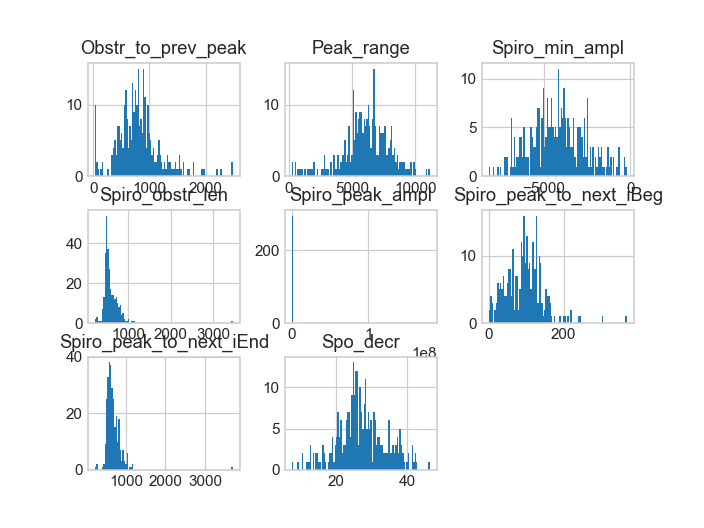

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B572D91710>,
      dtype=object)

In [32]:
patient_datas[1].hist(bins=100)

In [20]:
#patient_datas[3].hist(bins=100)

<IPython.core.display.Javascript object>


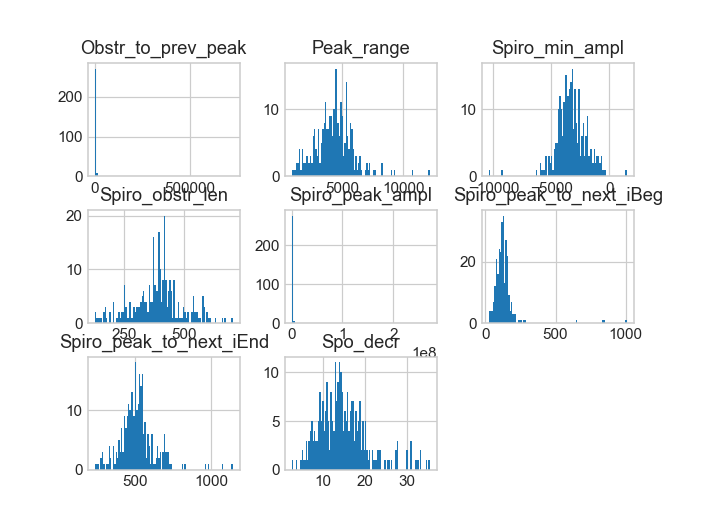

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B574C4BA90>,
      dtype=object)

In [33]:
patient_datas[4].hist(bins=100)

<IPython.core.display.Javascript object>


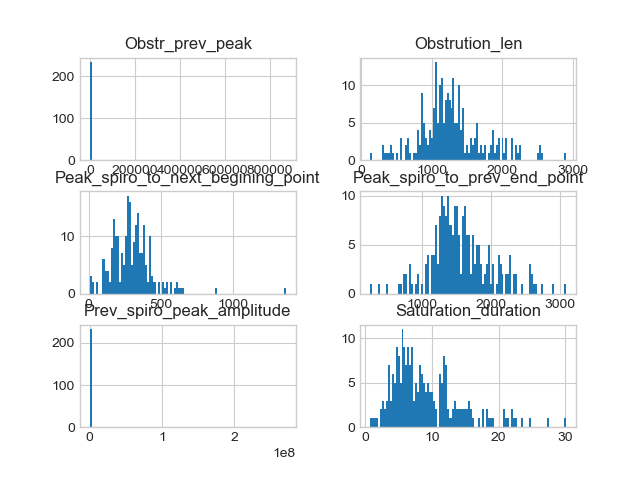

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D85C907A58>,
      dtype=object)

In [22]:
patient_datas[6].hist(bins=100)

<IPython.core.display.Javascript object>


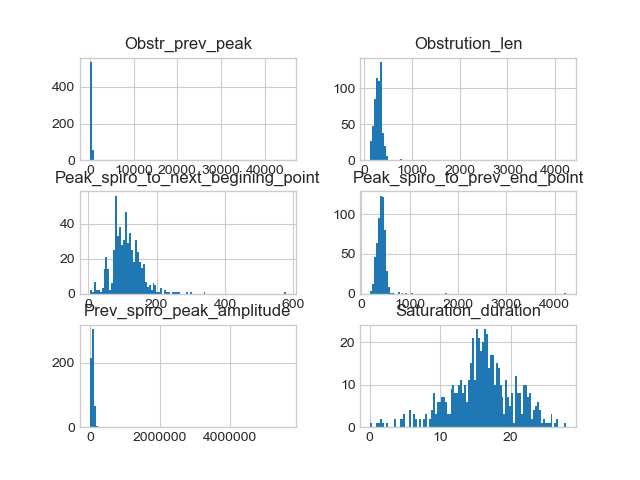

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D85D200E10>,
      dtype=object)

In [23]:
patient_datas[7].hist(bins=100)

In [24]:
#patient_datas[8].hist(bins=100)

In [34]:
def get_target(df, target_col):
    y = df[target_col]
    df.drop(target_col, axis=1, inplace=True)
    y.index = range(len(y))
    return y, df


patients_xy = {}
for patient_n, data in patient_datas.items():
    y, df = get_target(data, 'Spo_decr')
    patients_xy[patient_n] = {}
    patients_xy[patient_n]['x'] = df
    patients_xy[patient_n]['y'] = y
    

D:\Programming\Anaconda\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def standart_scale_df(df): 
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.columns = df.columns
    return df_scaled  
    
for data in patients_xy.values():
    data['x'] = standart_scale_df(data['x'])

### Outliers handling

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [40]:
def pca_to2dim(df):
    pca = PCA(n_components=2)
    return pca.fit_transform(df)


for data in patients_xy.values():
    data['x_pca'] = pca_to2dim(data['x'])

In [29]:
def dbscan_df(df, eps=1, min_samples=2):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df)
    return dbscan


def visul_dbcan_labels(df, dbscan):
    # Black removed and is used for noise instead.
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    plt.figure()
    unique_labels = set(dbscan.labels_)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (dbscan.labels_ == k)

        xy = df[class_member_mask & core_samples_mask]
        #print(xy)
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

        xy = df[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        
dbscan_objs = {}

<IPython.core.display.Javascript object>


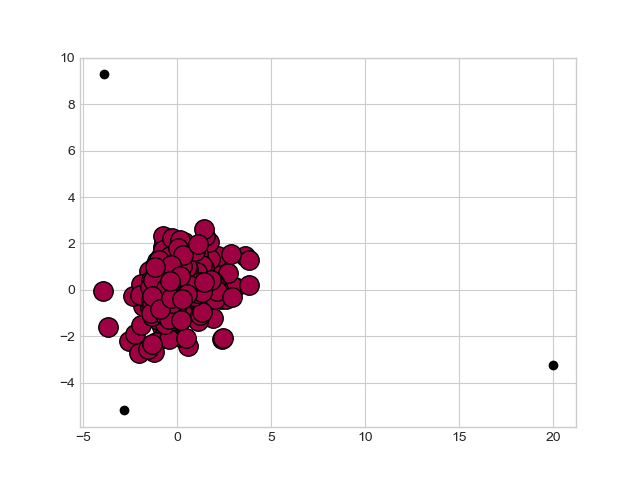

In [33]:
dbscan_objs[1] = dbscan_df(patients_xy[1]['x_pca'], 2, 2)
visul_dbcan_labels(patients_xy[1]['x_pca'], dbscan_objs[1])

In [34]:
"""dbscan_objs[3] = dbscan_df(patients_xy[3]['x_pca'], 1, 2)
visul_dbcan_labels(patients_xy[3]['x_pca'], dbscan_objs[3])"""

KeyError: 3

<IPython.core.display.Javascript object>


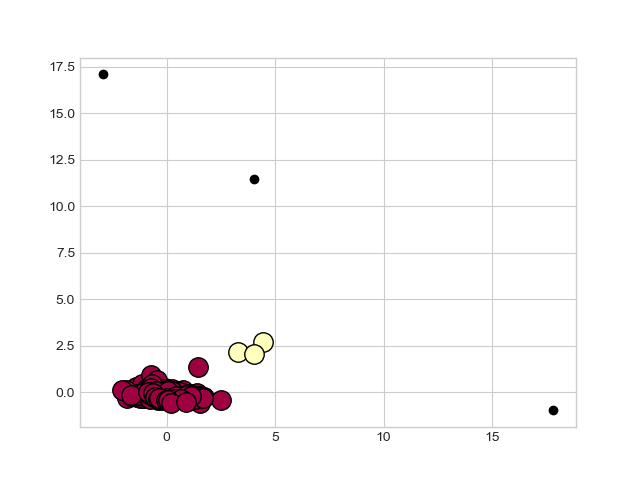

In [40]:
dbscan_objs[4] = dbscan_df(patients_xy[4]['x_pca'], 1.5, 2)
visul_dbcan_labels(patients_xy[4]['x_pca'], dbscan_objs[4])

<IPython.core.display.Javascript object>


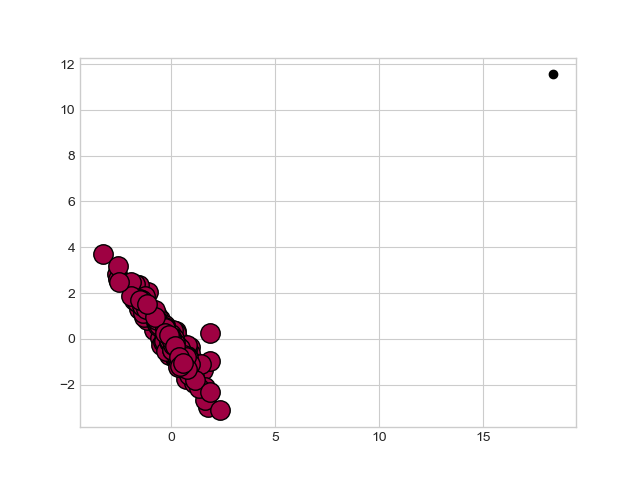

In [42]:
dbscan_objs[6] = dbscan_df(patients_xy[6]['x_pca'], 2, 2)
visul_dbcan_labels(patients_xy[6]['x_pca'], dbscan_objs[6])

<IPython.core.display.Javascript object>


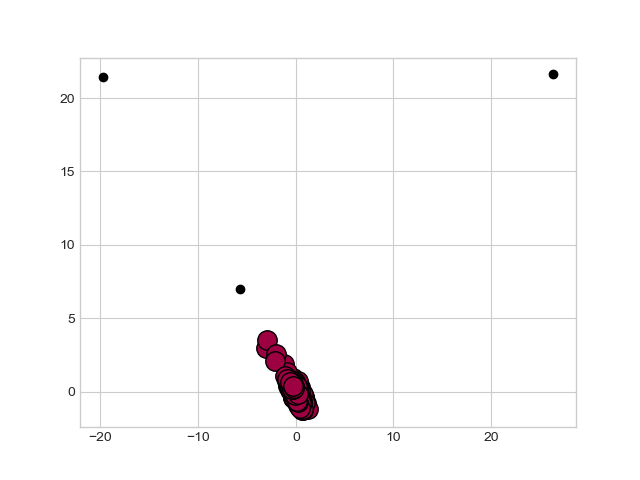

In [43]:
dbscan_objs[7] = dbscan_df(patients_xy[7]['x_pca'], 3, 2)
visul_dbcan_labels(patients_xy[7]['x_pca'], dbscan_objs[7])

<IPython.core.display.Javascript object>


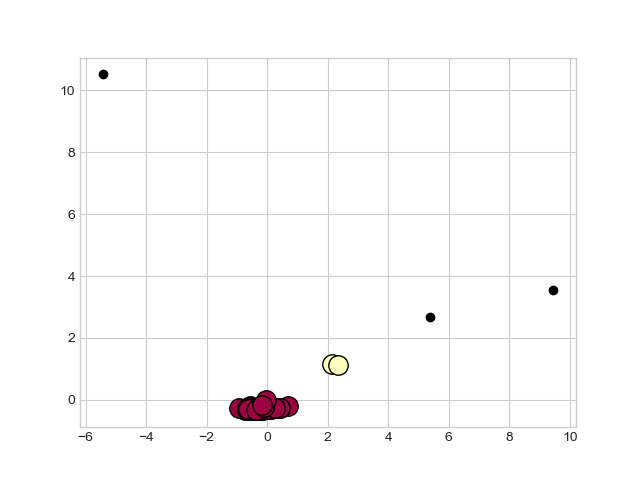

In [399]:
dbscan_objs[8] = dbscan_df(patients_xy[8]['x_pca'], 0.5, 2)
visul_dbcan_labels(patients_xy[8]['x_pca'], dbscan_objs[8])

In [44]:
def drop_noise(df, labels):    
    noise_indexes = np.where(labels == -1)[0]
    df_new = df.drop(noise_indexes, axis=0)
    df_new.index = range(0, len(df_new.index))
    return df_new


for patient_n, data in patients_xy.items():
    data['x'] = drop_noise(data['x'], dbscan_objs[patient_n].labels_)
    data['y'] = drop_noise(data['y'], dbscan_objs[patient_n].labels_)

In [45]:
def scale_target(y):
    scaler = StandardScaler()
    y_scaled = pd.DataFrame(scaler.fit_transform(np.reshape(np.array(y),(-1, 1))))
    y_scaled.columns = ['Saturation_duration']
    return y_scaled


for data in patients_xy.values():
    data['y_nscaled'] = scale_target(data['y'])

In [46]:
y_all = pd.DataFrame()
x_all = pd.DataFrame()
y_all_unscaled = pd.DataFrame()
for data in patients_xy.values():
    y_all = pd.concat([y_all, data['y_nscaled']], ignore_index=False)
    y_all_unscaled = pd.concat([y_all_unscaled, data['y']], ignore_index=False)
    x_all = pd.concat([x_all, data['x']], ignore_index=False)
    

In [47]:
y_all.shape, x_all.shape, y_all_unscaled.shape

((1497, 1), (1497, 5), (1497, 1))

<IPython.core.display.Javascript object>


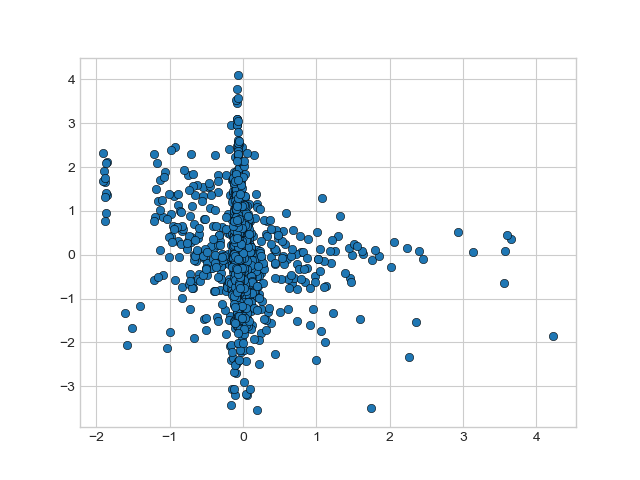

In [48]:
plt.figure()
ca = plt.gca()
ca.scatter(x_all.Obstr_prev_peak, y_all, edgecolors='k', linewidths=0.4)
#ca.set_xlim(-3, 5)
#ca.set_ylim(-4, 4)

<IPython.core.display.Javascript object>


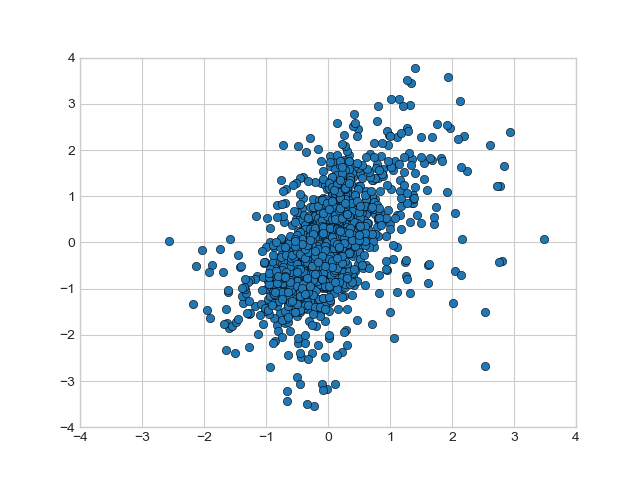

(-4, 4)

In [49]:
plt.figure()
ca = plt.gca()
ca.scatter(x_all.Obstrution_len, y_all, edgecolors='k', linewidths=0.4)
ca.set_xlim(-4, 4)
ca.set_ylim(-4, 4)

<IPython.core.display.Javascript object>


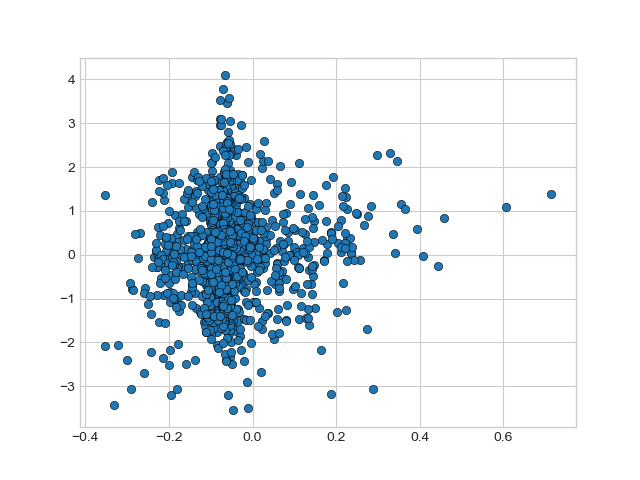

In [50]:
plt.figure()
ca = plt.gca()
ca.scatter(x_all.Prev_spiro_peak_amplitude, y_all, edgecolors='k', linewidths=0.4)


<IPython.core.display.Javascript object>


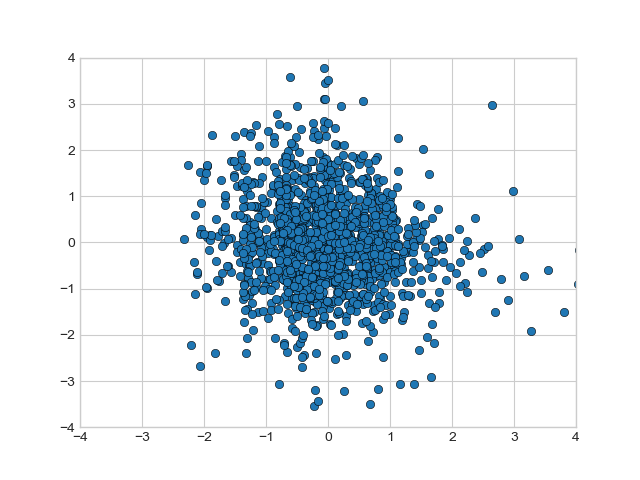

(-4, 4)

In [51]:
plt.figure()
ca = plt.gca()
ca.scatter(x_all.Peak_spiro_to_next_begining_point, y_all, edgecolors='k', linewidths=0.4)
ca.set_xlim(-4, 4)
ca.set_ylim(-4, 4)

<IPython.core.display.Javascript object>


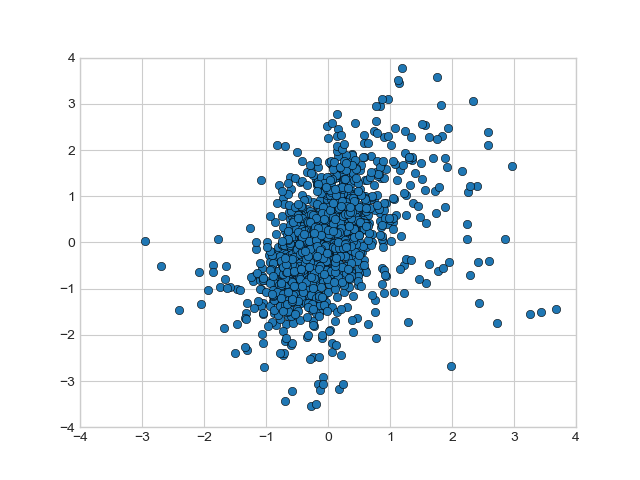

(-4, 4)

In [52]:
plt.figure()
ca = plt.gca()
ca.scatter(x_all.Peak_spiro_to_prev_end_point, y_all, edgecolors='k', linewidths=0.4)
ca.set_xlim(-4, 4)
ca.set_ylim(-4, 4)

### Modelling

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error

In [54]:
def model_gridsearch_evaluation(X, y, model_obj, param_grid, splitter, metric):
    grid_model = GridSearchCV(model_obj, param_grid, scoring=metric, cv=splitter, return_train_score=True, verbose=1)
    grid_model.fit(X, y)
    return grid_model

In [55]:
def grid_search_launching(df, y):
    metric = 'neg_mean_absolute_error'
    splitter = ShuffleSplit(n_splits=5)

    est = GradientBoostingRegressor()
    est_params = {'learning_rate': [0.05, 0.1, 0.2], 
                 'n_estimators': [50, 100, 200, 500]}

    lasso = Lasso()
    lasso_params = {'alpha': [0.5, 1, 1.5, 2]}

    ridge = Ridge()
    ridge_params = {'alpha': [0.5, 1, 1.5, 2]}

    svr = SVR()
    svr_params = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                 'degree': [2, 3, 4],
                 'gamma': ['auto', 'scale']}

    print('Lasso launched!')
    lasso_gs = model_gridsearch_evaluation(df, y, 
                                           lasso, lasso_params, 
                                           splitter, metric)
    print('Ridge launched!')
    ridge_gs = model_gridsearch_evaluation(df, y, 
                                           ridge, ridge_params, 
                                           splitter, metric)
    print('SVR launched!')
    svr_gs = model_gridsearch_evaluation(df, y, 
                                           svr, svr_params, 
                                           splitter, metric)
    print('GBoost launched!')
    est_gs = model_gridsearch_evaluation(df, y, 
                                           est, est_params, 
                                           splitter, metric)
    print('Grid searching completed\n____________________')
    
    return lasso_gs, ridge_gs, svr_gs, est_gs

In [56]:
patients_xy[1].keys()

dict_keys(['x', 'y', 'x_pca', 'y_nscaled'])

In [58]:
lasso_1, ridge_1, svr_1, est_1 = grid_search_launching(patients_xy[1]['x'], patients_xy[1]['y'])
#lasso_3, ridge_3, svr_3, est_3 = grid_search_launching(patients_xy[3]['x'], patients_xy[3]['y'])
lasso_4, ridge_4, svr_4, est_4 = grid_search_launching(patients_xy[4]['x'], patients_xy[4]['y'])
lasso_6, ridge_6, svr_6, est_6 = grid_search_launching(patients_xy[6]['x'], patients_xy[6]['y'])
lasso_7, ridge_7, svr_7, est_7 = grid_search_launching(patients_xy[7]['x'], patients_xy[7]['y'])
#lasso_8, ridge_8, svr_8, est_8 = grid_search_launching(patients_xy[8]['x'], patients_xy[8]['y'])

Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid searching completed
____________________


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.2s finished


In [59]:
lasso_all, ridge_all, svr_all, est_all = grid_search_launching(x_all, y_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.5s finished


Grid searching completed
____________________


In [60]:
def print_gs_results(lasso, ridge, svr, est):
    print('Results of grid search: \n Lasso: {}, \n Ridge: {}, \n SVR: {}, \n GBoost: {}.'.format(
        lasso.cv_results_['mean_test_score'],
        ridge.cv_results_['mean_test_score'],
        svr.cv_results_['mean_test_score'],
        est.cv_results_['mean_test_score']))
    
print_gs_results(lasso_1, ridge_1, svr_1, est_1)

Results of grid search: 
 Lasso: [-3.99003282 -4.13506008 -4.36631803 -4.66383633], 
 Ridge: [-3.99687494 -3.99700786 -3.9971071  -3.9971945 ], 
 SVR: [-3.99615075 -3.97282371 -5.30286162 -3.97676208 -3.99747226 -3.97282371
 -5.28386121 -4.52848063 -3.99615075 -3.97282371 -5.17354891 -3.97676208
 -3.99747226 -3.97282371 -5.30655032 -4.52848063 -3.99615075 -3.97282371
 -5.92458283 -3.97676208 -3.99747226 -3.97282371 -5.99242419 -4.52848063], 
 GBoost: [-4.07086293 -3.96976408 -4.07274725 -4.21387598 -4.07201004 -4.14214393
 -4.28314276 -4.56184121 -4.11245638 -4.18701408 -4.3054186  -4.39166325].


In [61]:
#print_gs_results(lasso_3, ridge_3, svr_3, est_3)

In [62]:
print_gs_results(lasso_4, ridge_4, svr_4, est_4)

Results of grid search: 
 Lasso: [-2.59971229 -2.76475197 -3.04985747 -3.40203025], 
 Ridge: [-2.51877913 -2.5258114  -2.52922661 -2.53091886], 
 SVR: [-2.59220495 -2.50900587 -4.06517141 -2.74200864 -2.60267169 -2.50900587
 -3.98752595 -2.90579044 -2.59220495 -2.50900587 -3.47616008 -2.74200864
 -2.60267169 -2.50900587 -3.29133146 -2.90579044 -2.59220495 -2.50900587
 -4.05736585 -2.74200864 -2.60267169 -2.50900587 -4.15890876 -2.90579044], 
 GBoost: [-2.53169968 -2.61566199 -2.69477314 -2.8115758  -2.65612953 -2.67824023
 -2.81052451 -2.88444928 -2.65100457 -2.76801523 -2.78317807 -2.79911401].


In [63]:
print_gs_results(lasso_6, ridge_6, svr_6, est_6)

Results of grid search: 
 Lasso: [-3.39603407 -3.547611   -3.74933792 -3.98182072], 
 Ridge: [-3.53117205 -3.53291288 -3.53340145 -3.53358533], 
 SVR: [-3.38639083 -3.46412309 -3.69061431 -3.39952292 -3.3875778  -3.46412309
 -3.68509971 -4.26617535 -3.38639083 -3.46412309 -3.78918265 -3.39952292
 -3.3875778  -3.46412309 -3.81806815 -4.26617535 -3.38639083 -3.46412309
 -3.76285066 -3.39952292 -3.3875778  -3.46412309 -3.75451939 -4.26617535], 
 GBoost: [-3.27452361 -3.47312675 -3.71249332 -3.99742429 -3.4616119  -3.64783443
 -3.8967455  -4.08320839 -3.68212055 -3.83144592 -3.98751106 -4.09992476].


In [64]:
print_gs_results(lasso_7, ridge_7, svr_7, est_7)

Results of grid search: 
 Lasso: [-3.1455206  -3.23587685 -3.23587685 -3.23587685], 
 Ridge: [-3.11289199 -3.12534408 -3.13196193 -3.13576571], 
 SVR: [-2.89586378 -3.03412779 -3.25311562 -3.26191473 -2.88454701 -3.03412779
 -3.19895026 -5.23380818 -2.89586378 -3.03412779 -3.30563411 -3.26191473
 -2.88454701 -3.03412779 -3.3195815  -5.23380818 -2.89586378 -3.03412779
 -3.33531337 -3.26191473 -2.88454701 -3.03412779 -3.29049663 -5.23380818], 
 GBoost: [-3.10695625 -3.03227952 -3.04151462 -3.1666822  -3.0211059  -3.03308462
 -3.16878314 -3.37378558 -3.03595635 -3.11521883 -3.28344174 -3.42718853].


In [65]:
#print_gs_results(lasso_8, ridge_8, svr_8, est_8)

In [66]:
print_gs_results(lasso_all, ridge_all, svr_all, est_all)

Results of grid search: 
 Lasso: [-0.77196652 -0.77196652 -0.77196652 -0.77196652], 
 Ridge: [-0.62664447 -0.62628354 -0.62595601 -0.6256619 ], 
 SVR: [ -0.63175642  -0.64518408  -0.74047032  -5.51496325  -0.63397455
  -0.64518408  -0.72696899 -10.81455853  -0.63175642  -0.64518408
  -0.76722776  -5.51496325  -0.63397455  -0.64518408  -0.75748489
 -10.81455853  -0.63175642  -0.64518408  -0.79749453  -5.51496325
  -0.63397455  -0.64518408  -0.7942164  -10.81455853], 
 GBoost: [-0.5883535  -0.57931204 -0.56889623 -0.57221424 -0.57534464 -0.56549296
 -0.56401219 -0.58458425 -0.57020413 -0.57143844 -0.58616773 -0.62169153].


In [67]:
def get_best_results(results):
    model_min_scores = {}
    for idx, model in enumerate(results):
        model_results_temp = abs(model.cv_results_['mean_test_score'])
        model_min_scores[idx] = [min(model_results_temp), np.argmax(model_results_temp)] 
    return model_min_scores

In [68]:
results_1 = (lasso_1, ridge_1, svr_1, est_1)
min_scores_1 = get_best_results(results_1)
"""
results_3 = (lasso_3, ridge_3, svr_3, est_3)
min_scores_3 = get_best_results(results_3)
"""
results_4 = (lasso_4, ridge_4, svr_4, est_4)
min_scores_4 = get_best_results(results_4)

results_6 = (lasso_6, ridge_6, svr_6, est_6)
min_scores_6 = get_best_results(results_6)

results_7 = (lasso_7, ridge_7, svr_7, est_7)
min_scores_7 = get_best_results(results_7)
"""
results_8 = (lasso_8, ridge_8, svr_8, est_8)
min_scores_8 = get_best_results(results_8)
"""
results_all = (lasso_all, ridge_all, svr_all, est_all)
min_scores_all = get_best_results(results_all) 

In [71]:
print('1 : {} \n' +
      '4 : {} \n' +
      '6 : {} \n' +
      '7 : {} \n'
      #'8 : {}' \
              .format(min_scores_1,
                      #min_scores_3,
                      min_scores_4,
                      min_scores_6,
                      min_scores_7,
                      #min_scores_8))
                     ))

1 : {} 
4 : {} 
6 : {} 
7 : {0: [3.990032815104607, 3], 1: [3.996874943372002, 3], 2: [3.9728237146030314, 22], 3: [3.969764077808463, 7]} 



In [72]:
svr_best_all = svr_all.best_estimator_
svr_best_all

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Visualization

In [73]:
from sklearn.metrics import r2_score

def testing_process(df, y, model, model_type):

    if model_type == 'l':
        model_new = Lasso(**model.best_params_)
    if model_type == 'r':
        model_new = Ridge(**model.best_params_)
    if model_type == 's':
        model_new = SVR(**model.best_params_)
    if model_type == 'gb':
        model_new = GradientBoostingRegressor(**model.best_params_)
    
    predictions = []
    ground_truth = []
    mae = []
    df.index = range(0, df.shape[0])
    y.index = range(0, y.shape[0])
    
    shuffled_data = pd.concat([df, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    """    
    for train_idx, test_idx in ShuffleSplit(n_splits=3).split(df, y):
        X_train = df.loc[train_idx]
        X_test = df.loc[test_idx]
        
        y_train = y.loc[train_idx]
        y_test = y.loc[test_idx]
    """
    model_new.fit(X_train, y_train)
    preds = model_new.predict(X_test)
    predictions.append(preds)
    ground_truth.append(y_test)
    mae.append(mean_absolute_error(preds, y_test))
    return predictions, ground_truth, model_new, mae

In [78]:
def split_xy(df):
    y = df.Saturation_duration
    x = df.drop('Saturation_duration', axis=1)
    return x, y


def normal_equation_testing(X, y):
    
    shuffled_data = pd.concat([X, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    
    beta_coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
    preds = np.matmul(X_test, beta_coeffs)
    metric = mean_absolute_error(preds, y_test)
    corr = get_correlation(preds, y_test)
    return beta_coeffs, metric, corr, preds, y_test

In [79]:
def get_correlation(gt, preds):
    #gt = np.array(gt).reshape([gt.shape[0], 1])
    preds = np.array(preds).reshape([preds.shape[0], 1])
    return np.corrcoef([np.array(gt), np.array(preds)])

In [80]:
pred_all, ground_truth_all, model_all, mae_all = testing_process(x_all, y_all, svr_all, 's')

In [81]:
patients_xy[1]['x'].shape

(395, 5)

In [82]:
def get_correlation_and_r2(gt, pred, mae):
    
    less_mae_idx = np.argmin(mae)
    new_shape = (pred[less_mae_idx].shape[0], 1)
    a = pd.DataFrame(pred[less_mae_idx].reshape(new_shape))
    b = pd.DataFrame(np.array(gt[less_mae_idx]).reshape(new_shape))
    ccorr = pd.concat([b, a], axis=1).corr()
    r2 = r2_score(b, a)
    return ccorr, r2

In [83]:
pred_1, ground_truth_1, model_1, mae_1 = testing_process(patients_xy[1]['x'], patients_xy[1]['y'], ridge_1, 'r')
corr_1, r2_1 = get_correlation_and_r2(ground_truth_1, pred_1, mae_1)

print(corr_1, r2_1, len(pred_1[0]))

          0         0
0  1.000000  0.623365
0  0.623365  1.000000 0.3609338247571927 118


<IPython.core.display.Javascript object>


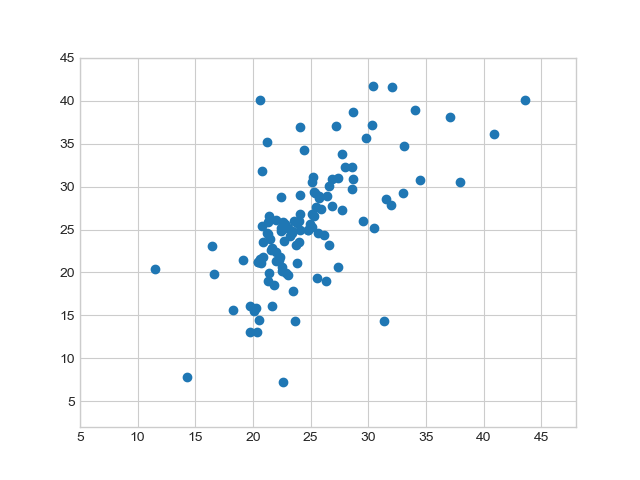

(2, 45)

In [84]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_1, ground_truth_1)
ca.set_xlim(5, 48)
ca.set_ylim(2, 45)

In [85]:
"""pred_3, ground_truth_3, model_3, mae_3 = testing_process(patients_xy[3]['x'], patients_xy[3]['y'], svr_3, 's')
corr_3, r2_3 = get_correlation_and_r2(ground_truth_3, pred_3, mae_3)

print(corr_3, r2_3, len(pred_3[0]))"""

KeyError: 3

In [91]:
pred_4, ground_truth_4, model_4, mae_4 = testing_process(patients_xy[4]['x'], patients_xy[4]['y'], svr_4, 's')
corr_4, r2_4 = get_correlation_and_r2(ground_truth_4, pred_4, mae_4)

print(corr_4, r2_4, len(pred_4[0]))

          0         0
0  1.000000  0.810885
0  0.810885  1.000000 0.6331057965279556 84


<IPython.core.display.Javascript object>


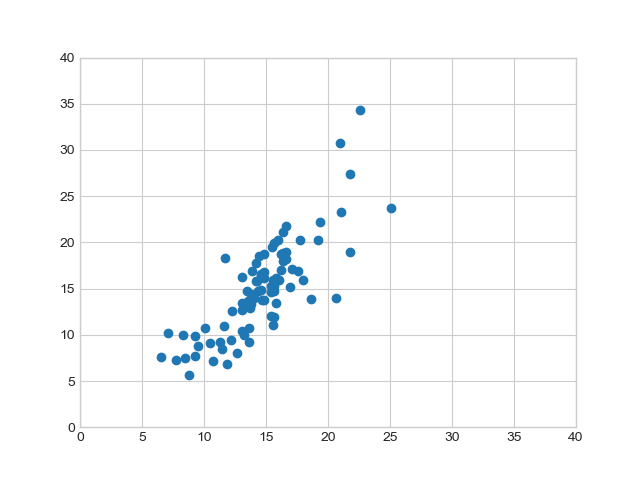

(0, 40)

In [92]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_4, ground_truth_4)
ca.set_xlim(0, 40)
ca.set_ylim(0, 40)

In [105]:
pred_6, ground_truth_6, model_6, mae_6 = testing_process(patients_xy[6]['x'], patients_xy[6]['y'], svr_6, 's')
corr_6, r2_6 = get_correlation_and_r2(ground_truth_6, pred_6, mae_6)

print(corr_6, r2_6, len(pred_6[0]))



          0         0
0  1.000000  0.572046
0  0.572046  1.000000 0.251116756422728 69


<IPython.core.display.Javascript object>


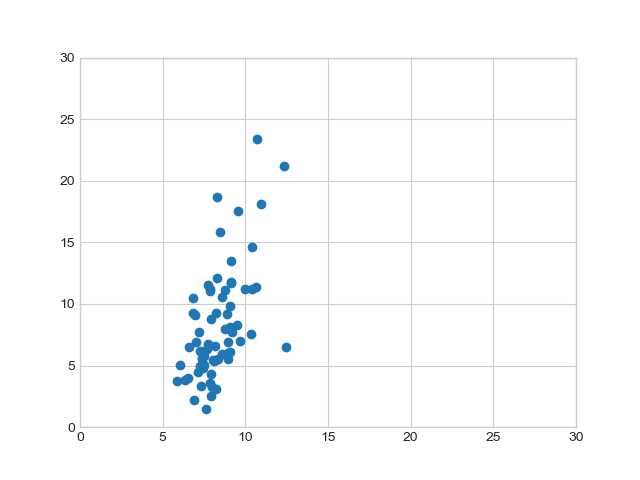

(0, 30)

In [106]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_6, ground_truth_6)
ca.set_xlim(0, 30)
ca.set_ylim(0, 30)

In [121]:
pred_7, ground_truth_7, model_7, mae_7 = testing_process(patients_xy[7]['x'], patients_xy[7]['y'], est_7, 'gb')
corr_7, r2_7 = get_correlation_and_r2(ground_truth_7, pred_7, mae_7)

print(corr_7, r2_7, len(pred_7[0]))


          0         0
0  1.000000  0.494862
0  0.494862  1.000000 0.23416847472601554 176


<IPython.core.display.Javascript object>


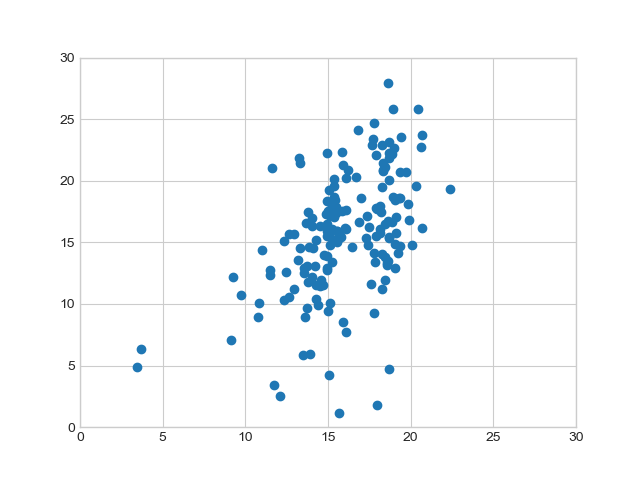

(0, 30)

In [122]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_7, ground_truth_7)
ca.set_xlim(0, 30)
ca.set_ylim(0, 30)

In [135]:
pred_8, ground_truth_8, model_8, mae_8 = testing_process(patients_xy[8]['x'], patients_xy[8]['y'], svr_8, 's')
corr_8, r2_8 = get_correlation_and_r2(ground_truth_8, pred_8, mae_8)

print(corr_8, r2_8, len(pred_8[0]))

          0         0
0  1.000000  0.725357
0  0.725357  1.000000 0.44405055218418166 7


In [123]:
from keras import models 
from keras import layers
from keras import optimizers
from keras import regularizers

Using TensorFlow backend.


In [124]:
def evaluate_model(model, X, y, splitter, n_epochs):
       
    all_mae_histories = []
    all_mae_histories_val = []
    ground_truth = []
    predictions = []
    
    shuffled_data = pd.concat([X, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    print('Train data shape:{}, Test data shape:{}'.format(X_train.shape, X_test.shape))

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=n_epochs, verbose=1, batch_size=1)

    ground_truth.append(y_test)
    preds = model.predict(X_test)
    predictions.append(preds)

    mae_history = history.history['mean_absolute_error']
    mea_history_val = mean_absolute_error(preds, y_test)

    all_mae_histories.append(mae_history)
    all_mae_histories_val.append(mea_history_val)
           
    average_mae_history = [
                np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]
    
    average_mae_history_val = [
                np.mean([x for x in all_mae_histories_val]) for i in range(n_epochs)]
    
    return model, average_mae_history, average_mae_history_val, ground_truth, predictions

n_features = len(x_all.columns)

In [125]:
path_to_save = 'C:/Users/Gagampy/YandexDisk/YandexDisk/Nauch_Rabota/Spiro/Database_csv/EDA_output/'
x_all.to_csv(path_to_save + 'x_all.csv')
y_all.to_csv(path_to_save + 'y_all.csv')
y_all_unscaled.to_csv(path_to_save + 'y_unscaled.csv')

In [126]:
data['x'].shape

(588, 5)

In [127]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.005, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_1, mae_avrg_f_1, mae_avrg_val_f_1, gt_1, preds_1 = evaluate_model(model_f, 
                                                                          patients_xy[1]['x'], 
                                                                          patients_xy[1]['y'], 
                                                                          splitter, 1000)

Train data shape:(277, 5), Test data shape:(118, 5)
Train on 277 samples, validate on 118 samples
Epoch 1/1000
277/277 [==============================] - 2s 9ms/step - loss: 583.9423 - mean_absolute_error: 23.1423 - val_loss: 500.3150 - val_mean_absolute_error: 21.2720
Epoch 2/1000
277/277 [==============================] - 1s 2ms/step - loss: 426.8996 - mean_absolute_error: 19.4375 - val_loss: 353.9431 - val_mean_absolute_error: 17.6370
Epoch 3/1000
277/277 [==============================] - 0s 2ms/step - loss: 284.2342 - mean_absolute_error: 15.6176 - val_loss: 230.9564 - val_mean_absolute_error: 14.0059
Epoch 4/1000
277/277 [==============================] - 0s 2ms/step - loss: 178.4243 - mean_absolute_error: 11.9430 - val_loss: 147.9806 - val_mean_absolute_error: 10.8555
Epoch 5/1000
277/277 [==============================] - 0s 2ms/step - loss: 113.4609 - mean_absolute_error: 9.2286 - val_loss: 101.3365 - val_mean_absolute_error: 8.7060
Epoch 6/1000
277/277 [======================

Epoch 49/1000
277/277 [==============================] - 0s 2ms/step - loss: 39.7323 - mean_absolute_error: 4.7610 - val_loss: 38.2024 - val_mean_absolute_error: 4.6480
Epoch 50/1000
277/277 [==============================] - 0s 2ms/step - loss: 37.4725 - mean_absolute_error: 4.7505 - val_loss: 38.0529 - val_mean_absolute_error: 4.6392
Epoch 51/1000
277/277 [==============================] - 1s 2ms/step - loss: 38.0698 - mean_absolute_error: 4.6647 - val_loss: 37.9100 - val_mean_absolute_error: 4.6283
Epoch 52/1000
277/277 [==============================] - 0s 2ms/step - loss: 39.3186 - mean_absolute_error: 4.8284 - val_loss: 37.8192 - val_mean_absolute_error: 4.6301
Epoch 53/1000
277/277 [==============================] - 0s 2ms/step - loss: 35.6926 - mean_absolute_error: 4.5613 - val_loss: 37.6924 - val_mean_absolute_error: 4.6216
Epoch 54/1000
277/277 [==============================] - 0s 2ms/step - loss: 38.4377 - mean_absolute_error: 4.7264 - val_loss: 37.5928 - val_mean_absolute_

277/277 [==============================] - 0s 2ms/step - loss: 31.2069 - mean_absolute_error: 4.2549 - val_loss: 32.0556 - val_mean_absolute_error: 4.1813
Epoch 146/1000
277/277 [==============================] - 1s 2ms/step - loss: 30.6371 - mean_absolute_error: 4.2092 - val_loss: 32.0329 - val_mean_absolute_error: 4.1798
Epoch 147/1000
277/277 [==============================] - 1s 2ms/step - loss: 34.0202 - mean_absolute_error: 4.2862 - val_loss: 32.0297 - val_mean_absolute_error: 4.1862
Epoch 148/1000
277/277 [==============================] - 1s 2ms/step - loss: 32.6076 - mean_absolute_error: 4.4235 - val_loss: 31.9859 - val_mean_absolute_error: 4.1812
Epoch 149/1000
277/277 [==============================] - 0s 2ms/step - loss: 31.2741 - mean_absolute_error: 4.2386 - val_loss: 31.9167 - val_mean_absolute_error: 4.1711
Epoch 150/1000
277/277 [==============================] - 1s 2ms/step - loss: 33.4791 - mean_absolute_error: 4.3723 - val_loss: 31.9070 - val_mean_absolute_error: 4.

277/277 [==============================] - 0s 2ms/step - loss: 31.2041 - mean_absolute_error: 4.2084 - val_loss: 30.1294 - val_mean_absolute_error: 4.0266
Epoch 242/1000
277/277 [==============================] - 0s 1ms/step - loss: 31.0670 - mean_absolute_error: 4.1609 - val_loss: 30.1348 - val_mean_absolute_error: 4.0293
Epoch 243/1000
277/277 [==============================] - 0s 1ms/step - loss: 30.3691 - mean_absolute_error: 4.1137 - val_loss: 30.1319 - val_mean_absolute_error: 4.0325
Epoch 244/1000
277/277 [==============================] - 0s 1ms/step - loss: 29.7558 - mean_absolute_error: 4.0626 - val_loss: 30.1154 - val_mean_absolute_error: 4.0329
Epoch 245/1000
277/277 [==============================] - 0s 2ms/step - loss: 29.1529 - mean_absolute_error: 4.0578 - val_loss: 30.1097 - val_mean_absolute_error: 4.0331
Epoch 246/1000
277/277 [==============================] - 0s 1ms/step - loss: 29.1587 - mean_absolute_error: 4.0997 - val_loss: 30.1009 - val_mean_absolute_error: 4.

277/277 [==============================] - 0s 2ms/step - loss: 28.0668 - mean_absolute_error: 3.9085 - val_loss: 29.3666 - val_mean_absolute_error: 3.9590
Epoch 338/1000
277/277 [==============================] - 0s 2ms/step - loss: 28.3229 - mean_absolute_error: 4.0483 - val_loss: 29.3505 - val_mean_absolute_error: 3.9588
Epoch 339/1000
277/277 [==============================] - 0s 2ms/step - loss: 27.6253 - mean_absolute_error: 3.9700 - val_loss: 29.3548 - val_mean_absolute_error: 3.9600
Epoch 340/1000
277/277 [==============================] - 0s 2ms/step - loss: 31.5654 - mean_absolute_error: 4.1183 - val_loss: 29.3484 - val_mean_absolute_error: 3.9597
Epoch 341/1000
277/277 [==============================] - 0s 1ms/step - loss: 29.5237 - mean_absolute_error: 4.1256 - val_loss: 29.3287 - val_mean_absolute_error: 3.9564
Epoch 342/1000
277/277 [==============================] - 0s 2ms/step - loss: 26.9161 - mean_absolute_error: 3.8944 - val_loss: 29.3224 - val_mean_absolute_error: 3.

277/277 [==============================] - 0s 1ms/step - loss: 29.4448 - mean_absolute_error: 4.0419 - val_loss: 28.9152 - val_mean_absolute_error: 3.9234
Epoch 434/1000
277/277 [==============================] - 0s 2ms/step - loss: 28.6079 - mean_absolute_error: 3.9930 - val_loss: 28.9104 - val_mean_absolute_error: 3.9231
Epoch 435/1000
277/277 [==============================] - 0s 2ms/step - loss: 29.7222 - mean_absolute_error: 4.0772 - val_loss: 28.8973 - val_mean_absolute_error: 3.9204
Epoch 436/1000
277/277 [==============================] - 0s 2ms/step - loss: 27.8833 - mean_absolute_error: 3.8989 - val_loss: 28.8799 - val_mean_absolute_error: 3.9178
Epoch 437/1000
277/277 [==============================] - 1s 2ms/step - loss: 28.6249 - mean_absolute_error: 4.0838 - val_loss: 28.8776 - val_mean_absolute_error: 3.9187
Epoch 438/1000
277/277 [==============================] - 0s 2ms/step - loss: 28.3084 - mean_absolute_error: 3.8971 - val_loss: 28.8739 - val_mean_absolute_error: 3.

277/277 [==============================] - 0s 1ms/step - loss: 27.1003 - mean_absolute_error: 3.8543 - val_loss: 28.5846 - val_mean_absolute_error: 3.8872
Epoch 530/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.1117 - mean_absolute_error: 3.9034 - val_loss: 28.5831 - val_mean_absolute_error: 3.8893
Epoch 531/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.1853 - mean_absolute_error: 3.9138 - val_loss: 28.5711 - val_mean_absolute_error: 3.8872
Epoch 532/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.7353 - mean_absolute_error: 4.0434 - val_loss: 28.5666 - val_mean_absolute_error: 3.8866
Epoch 533/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.9887 - mean_absolute_error: 4.0160 - val_loss: 28.5616 - val_mean_absolute_error: 3.8845
Epoch 534/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.1394 - mean_absolute_error: 3.9027 - val_loss: 28.5747 - val_mean_absolute_error: 3.

Epoch 577/1000
277/277 [==============================] - 0s 1ms/step - loss: 26.7409 - mean_absolute_error: 3.8799 - val_loss: 28.5253 - val_mean_absolute_error: 3.8800
Epoch 578/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.3876 - mean_absolute_error: 3.9335 - val_loss: 28.5243 - val_mean_absolute_error: 3.8807
Epoch 579/1000
277/277 [==============================] - 0s 1ms/step - loss: 26.9192 - mean_absolute_error: 3.8934 - val_loss: 28.5285 - val_mean_absolute_error: 3.8830
Epoch 580/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.4129 - mean_absolute_error: 3.9852 - val_loss: 28.5257 - val_mean_absolute_error: 3.8807
Epoch 581/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.5890 - mean_absolute_error: 3.8642 - val_loss: 28.5178 - val_mean_absolute_error: 3.8791
Epoch 582/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.7793 - mean_absolute_error: 4.0854 - val_loss: 28.5285 - val_mean_abs

277/277 [==============================] - 0s 2ms/step - loss: 27.7081 - mean_absolute_error: 3.8852 - val_loss: 28.4048 - val_mean_absolute_error: 3.8594
Epoch 674/1000
277/277 [==============================] - 0s 2ms/step - loss: 27.1009 - mean_absolute_error: 3.8400 - val_loss: 28.4099 - val_mean_absolute_error: 3.8602
Epoch 675/1000
277/277 [==============================] - 0s 2ms/step - loss: 28.5506 - mean_absolute_error: 3.9405 - val_loss: 28.4081 - val_mean_absolute_error: 3.8612
Epoch 676/1000
277/277 [==============================] - 0s 2ms/step - loss: 26.9677 - mean_absolute_error: 3.8389 - val_loss: 28.4111 - val_mean_absolute_error: 3.8625
Epoch 677/1000
277/277 [==============================] - 0s 2ms/step - loss: 28.8452 - mean_absolute_error: 4.0346 - val_loss: 28.4121 - val_mean_absolute_error: 3.8642
Epoch 678/1000
277/277 [==============================] - 1s 2ms/step - loss: 28.8985 - mean_absolute_error: 3.9752 - val_loss: 28.4071 - val_mean_absolute_error: 3.

277/277 [==============================] - 0s 2ms/step - loss: 27.6445 - mean_absolute_error: 3.9369 - val_loss: 28.3398 - val_mean_absolute_error: 3.8552
Epoch 770/1000
277/277 [==============================] - 0s 2ms/step - loss: 25.9278 - mean_absolute_error: 3.7489 - val_loss: 28.3276 - val_mean_absolute_error: 3.8541
Epoch 771/1000
277/277 [==============================] - 0s 2ms/step - loss: 27.6804 - mean_absolute_error: 3.9475 - val_loss: 28.3299 - val_mean_absolute_error: 3.8549
Epoch 772/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.2350 - mean_absolute_error: 3.8474 - val_loss: 28.3282 - val_mean_absolute_error: 3.8551
Epoch 773/1000
277/277 [==============================] - 0s 2ms/step - loss: 27.7062 - mean_absolute_error: 3.8298 - val_loss: 28.3292 - val_mean_absolute_error: 3.8566
Epoch 774/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.0786 - mean_absolute_error: 3.9476 - val_loss: 28.3289 - val_mean_absolute_error: 3.

277/277 [==============================] - 0s 1ms/step - loss: 28.0243 - mean_absolute_error: 4.0056 - val_loss: 28.3160 - val_mean_absolute_error: 3.8500
Epoch 866/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.8200 - mean_absolute_error: 3.9248 - val_loss: 28.3160 - val_mean_absolute_error: 3.8508
Epoch 867/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.3302 - mean_absolute_error: 4.0388 - val_loss: 28.3126 - val_mean_absolute_error: 3.8500
Epoch 868/1000
277/277 [==============================] - 0s 1ms/step - loss: 26.9530 - mean_absolute_error: 3.8572 - val_loss: 28.3101 - val_mean_absolute_error: 3.8499
Epoch 869/1000
277/277 [==============================] - 0s 1ms/step - loss: 29.1297 - mean_absolute_error: 3.9248 - val_loss: 28.3052 - val_mean_absolute_error: 3.8468
Epoch 870/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.5107 - mean_absolute_error: 3.8631 - val_loss: 28.3074 - val_mean_absolute_error: 3.

277/277 [==============================] - 0s 1ms/step - loss: 26.9599 - mean_absolute_error: 3.8677 - val_loss: 28.2269 - val_mean_absolute_error: 3.8389
Epoch 962/1000
277/277 [==============================] - 0s 1ms/step - loss: 25.9039 - mean_absolute_error: 3.8379 - val_loss: 28.2361 - val_mean_absolute_error: 3.8402
Epoch 963/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.5505 - mean_absolute_error: 4.0593 - val_loss: 28.2385 - val_mean_absolute_error: 3.8398
Epoch 964/1000
277/277 [==============================] - 0s 1ms/step - loss: 26.5435 - mean_absolute_error: 3.9215 - val_loss: 28.2390 - val_mean_absolute_error: 3.8379
Epoch 965/1000
277/277 [==============================] - 0s 1ms/step - loss: 28.4689 - mean_absolute_error: 3.9346 - val_loss: 28.2380 - val_mean_absolute_error: 3.8390
Epoch 966/1000
277/277 [==============================] - 0s 1ms/step - loss: 27.0027 - mean_absolute_error: 3.7866 - val_loss: 28.2303 - val_mean_absolute_error: 3.

         0        0
0  1.00000  0.64999
0  0.64999  1.00000 0.42210232484939614 118


<IPython.core.display.Javascript object>


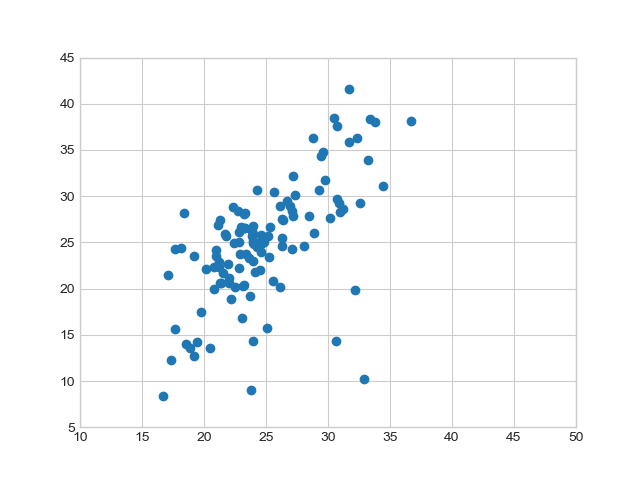

(5, 45)

In [128]:
corr_nn_1, r2_nn_1 = get_correlation_and_r2(gt_1, preds_1, mae_avrg_val_f_1)

print(corr_nn_1, r2_nn_1, len(preds_1[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_1, gt_1)
ca.set_xlim(10, 50)
ca.set_ylim(5, 45)

In [129]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_4, mae_avrg_f_4, mae_avrg_val_f_4, gt_4, preds_4 = evaluate_model(model_f, 
                                                                          patients_xy[4]['x'], 
                                                                          patients_xy[4]['y'], 
                                                                          splitter, 1000)

Train data shape:(197, 5), Test data shape:(84, 5)
Train on 197 samples, validate on 84 samples
Epoch 1/1000
197/197 [==============================] - 1s 3ms/step - loss: 240.4766 - mean_absolute_error: 14.5849 - val_loss: 221.9837 - val_mean_absolute_error: 14.0142
Epoch 2/1000
197/197 [==============================] - 0s 2ms/step - loss: 238.6600 - mean_absolute_error: 14.5139 - val_loss: 220.6883 - val_mean_absolute_error: 13.9637
Epoch 3/1000
197/197 [==============================] - 0s 2ms/step - loss: 237.6932 - mean_absolute_error: 14.4756 - val_loss: 219.7245 - val_mean_absolute_error: 13.9262
Epoch 4/1000
197/197 [==============================] - 0s 2ms/step - loss: 236.8414 - mean_absolute_error: 14.4409 - val_loss: 218.9225 - val_mean_absolute_error: 13.8950
Epoch 5/1000
197/197 [==============================] - 0s 2ms/step - loss: 236.0383 - mean_absolute_error: 14.4114 - val_loss: 218.2063 - val_mean_absolute_error: 13.8675
Epoch 6/1000
197/197 [======================

Epoch 48/1000
197/197 [==============================] - 0s 2ms/step - loss: 202.7983 - mean_absolute_error: 13.1784 - val_loss: 185.3732 - val_mean_absolute_error: 12.6259
Epoch 49/1000
197/197 [==============================] - 0s 1ms/step - loss: 202.2844 - mean_absolute_error: 13.1533 - val_loss: 184.4435 - val_mean_absolute_error: 12.5898
Epoch 50/1000
197/197 [==============================] - 0s 1ms/step - loss: 201.1088 - mean_absolute_error: 13.1094 - val_loss: 183.5017 - val_mean_absolute_error: 12.5531
Epoch 51/1000
197/197 [==============================] - 0s 1ms/step - loss: 200.0192 - mean_absolute_error: 13.0719 - val_loss: 182.5483 - val_mean_absolute_error: 12.5159
Epoch 52/1000
197/197 [==============================] - 0s 2ms/step - loss: 199.3955 - mean_absolute_error: 13.0420 - val_loss: 181.5990 - val_mean_absolute_error: 12.4788
Epoch 53/1000
197/197 [==============================] - 0s 1ms/step - loss: 198.1408 - mean_absolute_error: 13.0102 - val_loss: 180.63

197/197 [==============================] - 0s 2ms/step - loss: 103.1195 - mean_absolute_error: 8.8575 - val_loss: 89.1489 - val_mean_absolute_error: 8.2056
Epoch 143/1000
197/197 [==============================] - 0s 2ms/step - loss: 102.5765 - mean_absolute_error: 8.8101 - val_loss: 88.2396 - val_mean_absolute_error: 8.1538
Epoch 144/1000
197/197 [==============================] - 0s 2ms/step - loss: 101.1906 - mean_absolute_error: 8.7602 - val_loss: 87.3329 - val_mean_absolute_error: 8.1018
Epoch 145/1000
197/197 [==============================] - 0s 2ms/step - loss: 100.0581 - mean_absolute_error: 8.6722 - val_loss: 86.4340 - val_mean_absolute_error: 8.0499
Epoch 146/1000
197/197 [==============================] - 0s 2ms/step - loss: 100.3264 - mean_absolute_error: 8.6749 - val_loss: 85.5464 - val_mean_absolute_error: 7.9984
Epoch 147/1000
197/197 [==============================] - 0s 2ms/step - loss: 99.5996 - mean_absolute_error: 8.6455 - val_loss: 84.6606 - val_mean_absolute_erro

197/197 [==============================] - 0s 1ms/step - loss: 42.1842 - mean_absolute_error: 5.1658 - val_loss: 31.0793 - val_mean_absolute_error: 4.3199
Epoch 239/1000
197/197 [==============================] - 0s 1ms/step - loss: 41.8512 - mean_absolute_error: 5.1897 - val_loss: 30.7604 - val_mean_absolute_error: 4.2961
Epoch 240/1000
197/197 [==============================] - 0s 1ms/step - loss: 40.5462 - mean_absolute_error: 5.1025 - val_loss: 30.4451 - val_mean_absolute_error: 4.2724
Epoch 241/1000
197/197 [==============================] - 0s 1ms/step - loss: 40.7797 - mean_absolute_error: 5.0774 - val_loss: 30.1354 - val_mean_absolute_error: 4.2489
Epoch 242/1000
197/197 [==============================] - 0s 1ms/step - loss: 40.3566 - mean_absolute_error: 5.0500 - val_loss: 29.8317 - val_mean_absolute_error: 4.2256
Epoch 243/1000
197/197 [==============================] - 0s 1ms/step - loss: 39.2837 - mean_absolute_error: 4.9767 - val_loss: 29.5323 - val_mean_absolute_error: 4.

197/197 [==============================] - 0s 1ms/step - loss: 22.9293 - mean_absolute_error: 3.6119 - val_loss: 15.2793 - val_mean_absolute_error: 2.8871
Epoch 335/1000
197/197 [==============================] - 0s 2ms/step - loss: 22.2593 - mean_absolute_error: 3.5964 - val_loss: 15.2176 - val_mean_absolute_error: 2.8809
Epoch 336/1000
197/197 [==============================] - 0s 2ms/step - loss: 23.8187 - mean_absolute_error: 3.6879 - val_loss: 15.1552 - val_mean_absolute_error: 2.8749
Epoch 337/1000
197/197 [==============================] - 0s 1ms/step - loss: 20.7881 - mean_absolute_error: 3.4497 - val_loss: 15.0965 - val_mean_absolute_error: 2.8692
Epoch 338/1000
197/197 [==============================] - 0s 1ms/step - loss: 22.3206 - mean_absolute_error: 3.5612 - val_loss: 15.0345 - val_mean_absolute_error: 2.8632
Epoch 339/1000
197/197 [==============================] - 0s 1ms/step - loss: 21.7617 - mean_absolute_error: 3.5266 - val_loss: 14.9738 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 1ms/step - loss: 17.1893 - mean_absolute_error: 3.2839 - val_loss: 12.3657 - val_mean_absolute_error: 2.5720
Epoch 431/1000
197/197 [==============================] - 0s 2ms/step - loss: 17.1282 - mean_absolute_error: 3.1525 - val_loss: 12.3542 - val_mean_absolute_error: 2.5714
Epoch 432/1000
197/197 [==============================] - 0s 1ms/step - loss: 17.7830 - mean_absolute_error: 3.2625 - val_loss: 12.3435 - val_mean_absolute_error: 2.5708
Epoch 433/1000
197/197 [==============================] - 0s 1ms/step - loss: 18.2812 - mean_absolute_error: 3.3248 - val_loss: 12.3330 - val_mean_absolute_error: 2.5702
Epoch 434/1000
197/197 [==============================] - 0s 1ms/step - loss: 18.1611 - mean_absolute_error: 3.3059 - val_loss: 12.3224 - val_mean_absolute_error: 2.5695
Epoch 435/1000
197/197 [==============================] - 0s 1ms/step - loss: 16.8746 - mean_absolute_error: 3.1657 - val_loss: 12.3117 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 1ms/step - loss: 16.4148 - mean_absolute_error: 3.2004 - val_loss: 11.8306 - val_mean_absolute_error: 2.5350
Epoch 527/1000
197/197 [==============================] - 0s 2ms/step - loss: 16.5672 - mean_absolute_error: 3.1425 - val_loss: 11.8279 - val_mean_absolute_error: 2.5347
Epoch 528/1000
197/197 [==============================] - 0s 1ms/step - loss: 16.4319 - mean_absolute_error: 3.1642 - val_loss: 11.8263 - val_mean_absolute_error: 2.5345
Epoch 529/1000
197/197 [==============================] - 0s 2ms/step - loss: 16.5391 - mean_absolute_error: 3.1100 - val_loss: 11.8242 - val_mean_absolute_error: 2.5343
Epoch 530/1000
197/197 [==============================] - 0s 2ms/step - loss: 16.3578 - mean_absolute_error: 3.1528 - val_loss: 11.8220 - val_mean_absolute_error: 2.5339
Epoch 531/1000
197/197 [==============================] - 0s 2ms/step - loss: 16.4226 - mean_absolute_error: 3.0656 - val_loss: 11.8199 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 1ms/step - loss: 15.4108 - mean_absolute_error: 3.0304 - val_loss: 11.7202 - val_mean_absolute_error: 2.5084
Epoch 623/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.2165 - mean_absolute_error: 3.0359 - val_loss: 11.7196 - val_mean_absolute_error: 2.5082
Epoch 624/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.4983 - mean_absolute_error: 3.0439 - val_loss: 11.7186 - val_mean_absolute_error: 2.5078
Epoch 625/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.2415 - mean_absolute_error: 3.0530 - val_loss: 11.7199 - val_mean_absolute_error: 2.5080
Epoch 626/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.2095 - mean_absolute_error: 3.0911 - val_loss: 11.7202 - val_mean_absolute_error: 2.5080
Epoch 627/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.9335 - mean_absolute_error: 3.1346 - val_loss: 11.7187 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 1ms/step - loss: 14.2769 - mean_absolute_error: 2.9855 - val_loss: 11.7052 - val_mean_absolute_error: 2.4828
Epoch 719/1000
197/197 [==============================] - 0s 1ms/step - loss: 13.5607 - mean_absolute_error: 2.9165 - val_loss: 11.7056 - val_mean_absolute_error: 2.4825
Epoch 720/1000
197/197 [==============================] - 0s 1ms/step - loss: 15.0360 - mean_absolute_error: 3.0089 - val_loss: 11.7057 - val_mean_absolute_error: 2.4822
Epoch 721/1000
197/197 [==============================] - 0s 2ms/step - loss: 15.0992 - mean_absolute_error: 3.0546 - val_loss: 11.7062 - val_mean_absolute_error: 2.4821
Epoch 722/1000
197/197 [==============================] - 1s 3ms/step - loss: 14.9594 - mean_absolute_error: 2.9642 - val_loss: 11.7070 - val_mean_absolute_error: 2.4819
Epoch 723/1000
197/197 [==============================] - 1s 3ms/step - loss: 15.5245 - mean_absolute_error: 3.0058 - val_loss: 11.7077 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 2ms/step - loss: 13.9970 - mean_absolute_error: 2.9623 - val_loss: 11.7379 - val_mean_absolute_error: 2.4579
Epoch 815/1000
197/197 [==============================] - 0s 2ms/step - loss: 15.0615 - mean_absolute_error: 2.9749 - val_loss: 11.7392 - val_mean_absolute_error: 2.4578
Epoch 816/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.7140 - mean_absolute_error: 2.9766 - val_loss: 11.7420 - val_mean_absolute_error: 2.4579
Epoch 817/1000
197/197 [==============================] - 0s 2ms/step - loss: 13.7716 - mean_absolute_error: 2.9164 - val_loss: 11.7424 - val_mean_absolute_error: 2.4577
Epoch 818/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.6894 - mean_absolute_error: 3.0431 - val_loss: 11.7433 - val_mean_absolute_error: 2.4577
Epoch 819/1000
197/197 [==============================] - 0s 2ms/step - loss: 13.3807 - mean_absolute_error: 2.8807 - val_loss: 11.7433 - val_mean_absolute_error: 2.

197/197 [==============================] - 0s 2ms/step - loss: 13.1945 - mean_absolute_error: 2.8252 - val_loss: 11.7622 - val_mean_absolute_error: 2.4334
Epoch 911/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.0116 - mean_absolute_error: 2.9585 - val_loss: 11.7631 - val_mean_absolute_error: 2.4332
Epoch 912/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.2850 - mean_absolute_error: 2.8970 - val_loss: 11.7640 - val_mean_absolute_error: 2.4332
Epoch 913/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.8152 - mean_absolute_error: 3.0395 - val_loss: 11.7641 - val_mean_absolute_error: 2.4330
Epoch 914/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.2088 - mean_absolute_error: 2.9387 - val_loss: 11.7637 - val_mean_absolute_error: 2.4326
Epoch 915/1000
197/197 [==============================] - 0s 2ms/step - loss: 14.8075 - mean_absolute_error: 2.9752 - val_loss: 11.7634 - val_mean_absolute_error: 2.

          0         0
0  1.000000  0.764355
0  0.764355  1.000000 0.5491656488641334 84


<IPython.core.display.Javascript object>


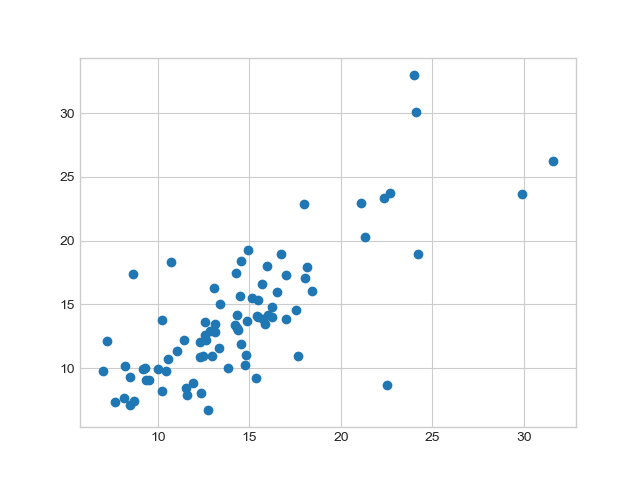

In [131]:
corr_nn_4, r2_nn_4 = get_correlation_and_r2(gt_4, preds_4, mae_avrg_val_f_4)

print(corr_nn_4, r2_nn_4, len(preds_4[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_4, gt_4)
#ca.set_xlim(10, 50)
#ca.set_ylim(5, 45)

In [132]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.004, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_7, mae_avrg_f_7, mae_avrg_val_f_7, gt_7, preds_7 = evaluate_model(model_f, 
                                                                          patients_xy[7]['x'], 
                                                                          patients_xy[7]['y'], 
                                                                          splitter, 1000)

Train data shape:(412, 5), Test data shape:(176, 5)
Train on 412 samples, validate on 176 samples
Epoch 1/1000
412/412 [==============================] - 1s 3ms/step - loss: 239.9396 - mean_absolute_error: 14.7056 - val_loss: 215.6131 - val_mean_absolute_error: 13.9058
Epoch 2/1000
412/412 [==============================] - 1s 2ms/step - loss: 183.3063 - mean_absolute_error: 12.6262 - val_loss: 160.1649 - val_mean_absolute_error: 11.7197
Epoch 3/1000
412/412 [==============================] - 1s 2ms/step - loss: 132.2870 - mean_absolute_error: 10.5442 - val_loss: 111.2205 - val_mean_absolute_error: 9.4896
Epoch 4/1000
412/412 [==============================] - 1s 2ms/step - loss: 90.4936 - mean_absolute_error: 8.5234 - val_loss: 74.8426 - val_mean_absolute_error: 7.5251
Epoch 5/1000
412/412 [==============================] - 1s 2ms/step - loss: 63.5132 - mean_absolute_error: 6.8838 - val_loss: 52.1571 - val_mean_absolute_error: 6.1188
Epoch 6/1000
412/412 [=============================

Epoch 49/1000
412/412 [==============================] - 1s 1ms/step - loss: 21.1867 - mean_absolute_error: 3.3776 - val_loss: 18.8674 - val_mean_absolute_error: 3.3533
Epoch 50/1000
412/412 [==============================] - 1s 1ms/step - loss: 21.7876 - mean_absolute_error: 3.4098 - val_loss: 18.8140 - val_mean_absolute_error: 3.3490
Epoch 51/1000
412/412 [==============================] - 1s 2ms/step - loss: 21.0544 - mean_absolute_error: 3.3841 - val_loss: 18.7616 - val_mean_absolute_error: 3.3437
Epoch 52/1000
412/412 [==============================] - 1s 2ms/step - loss: 21.9244 - mean_absolute_error: 3.4845 - val_loss: 18.7127 - val_mean_absolute_error: 3.3396
Epoch 53/1000
412/412 [==============================] - 1s 2ms/step - loss: 22.1285 - mean_absolute_error: 3.4102 - val_loss: 18.6657 - val_mean_absolute_error: 3.3357
Epoch 54/1000
412/412 [==============================] - 1s 2ms/step - loss: 21.4535 - mean_absolute_error: 3.4472 - val_loss: 18.6186 - val_mean_absolute_

412/412 [==============================] - 1s 2ms/step - loss: 19.5097 - mean_absolute_error: 3.2529 - val_loss: 16.5344 - val_mean_absolute_error: 3.1593
Epoch 146/1000
412/412 [==============================] - 1s 2ms/step - loss: 19.2827 - mean_absolute_error: 3.2384 - val_loss: 16.5223 - val_mean_absolute_error: 3.1582
Epoch 147/1000
412/412 [==============================] - 1s 2ms/step - loss: 19.7925 - mean_absolute_error: 3.2519 - val_loss: 16.5072 - val_mean_absolute_error: 3.1576
Epoch 148/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.8479 - mean_absolute_error: 3.2235 - val_loss: 16.4942 - val_mean_absolute_error: 3.1564
Epoch 149/1000
412/412 [==============================] - 1s 2ms/step - loss: 19.3699 - mean_absolute_error: 3.1976 - val_loss: 16.4844 - val_mean_absolute_error: 3.1558
Epoch 150/1000
412/412 [==============================] - 1s 2ms/step - loss: 19.4958 - mean_absolute_error: 3.2781 - val_loss: 16.4744 - val_mean_absolute_error: 3.

412/412 [==============================] - 1s 2ms/step - loss: 18.7757 - mean_absolute_error: 3.1765 - val_loss: 15.6720 - val_mean_absolute_error: 3.0956
Epoch 242/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.9559 - mean_absolute_error: 3.1543 - val_loss: 15.6668 - val_mean_absolute_error: 3.0951
Epoch 243/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.6100 - mean_absolute_error: 3.2563 - val_loss: 15.6630 - val_mean_absolute_error: 3.0949
Epoch 244/1000
412/412 [==============================] - 1s 2ms/step - loss: 19.1341 - mean_absolute_error: 3.2252 - val_loss: 15.6542 - val_mean_absolute_error: 3.0940
Epoch 245/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.7516 - mean_absolute_error: 3.1948 - val_loss: 15.6499 - val_mean_absolute_error: 3.0938
Epoch 246/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.1623 - mean_absolute_error: 3.1787 - val_loss: 15.6432 - val_mean_absolute_error: 3.

Epoch 289/1000
412/412 [==============================] - 1s 3ms/step - loss: 18.7293 - mean_absolute_error: 3.1867 - val_loss: 15.4266 - val_mean_absolute_error: 3.0775
Epoch 290/1000
412/412 [==============================] - 1s 3ms/step - loss: 19.0751 - mean_absolute_error: 3.2064 - val_loss: 15.4173 - val_mean_absolute_error: 3.0765
Epoch 291/1000
412/412 [==============================] - 1s 3ms/step - loss: 18.7092 - mean_absolute_error: 3.2084 - val_loss: 15.4071 - val_mean_absolute_error: 3.0754
Epoch 292/1000
412/412 [==============================] - 1s 3ms/step - loss: 18.5985 - mean_absolute_error: 3.1793 - val_loss: 15.4017 - val_mean_absolute_error: 3.0748
Epoch 293/1000
412/412 [==============================] - 1s 3ms/step - loss: 17.5998 - mean_absolute_error: 3.1539 - val_loss: 15.3961 - val_mean_absolute_error: 3.0743
Epoch 294/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.3020 - mean_absolute_error: 3.1801 - val_loss: 15.3928 - val_mean_abs

412/412 [==============================] - 1s 2ms/step - loss: 17.7300 - mean_absolute_error: 3.1288 - val_loss: 15.0592 - val_mean_absolute_error: 3.0449
Epoch 386/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.0140 - mean_absolute_error: 3.1630 - val_loss: 15.0583 - val_mean_absolute_error: 3.0449
Epoch 387/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.7585 - mean_absolute_error: 3.2402 - val_loss: 15.0558 - val_mean_absolute_error: 3.0446
Epoch 388/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.4051 - mean_absolute_error: 3.1777 - val_loss: 15.0565 - val_mean_absolute_error: 3.0450
Epoch 389/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.6627 - mean_absolute_error: 3.1257 - val_loss: 15.0528 - val_mean_absolute_error: 3.0447
Epoch 390/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.5234 - mean_absolute_error: 3.1820 - val_loss: 15.0508 - val_mean_absolute_error: 3.

412/412 [==============================] - 1s 2ms/step - loss: 18.3492 - mean_absolute_error: 3.1516 - val_loss: 14.8224 - val_mean_absolute_error: 3.0187
Epoch 482/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.8153 - mean_absolute_error: 3.2054 - val_loss: 14.8203 - val_mean_absolute_error: 3.0187
Epoch 483/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.8411 - mean_absolute_error: 3.1343 - val_loss: 14.8161 - val_mean_absolute_error: 3.0181
Epoch 484/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.6322 - mean_absolute_error: 3.2357 - val_loss: 14.8143 - val_mean_absolute_error: 3.0180
Epoch 485/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.1632 - mean_absolute_error: 3.0969 - val_loss: 14.8113 - val_mean_absolute_error: 3.0177
Epoch 486/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.8990 - mean_absolute_error: 3.1389 - val_loss: 14.8101 - val_mean_absolute_error: 3.

412/412 [==============================] - 1s 2ms/step - loss: 18.0176 - mean_absolute_error: 3.1511 - val_loss: 14.6576 - val_mean_absolute_error: 2.9982
Epoch 578/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.8174 - mean_absolute_error: 3.0825 - val_loss: 14.6592 - val_mean_absolute_error: 2.9982
Epoch 579/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.2998 - mean_absolute_error: 3.1567 - val_loss: 14.6587 - val_mean_absolute_error: 2.9981
Epoch 580/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.9758 - mean_absolute_error: 3.1238 - val_loss: 14.6562 - val_mean_absolute_error: 2.9975
Epoch 581/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.0130 - mean_absolute_error: 3.0884 - val_loss: 14.6548 - val_mean_absolute_error: 2.9974
Epoch 582/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.6067 - mean_absolute_error: 3.1434 - val_loss: 14.6524 - val_mean_absolute_error: 2.

412/412 [==============================] - 1s 2ms/step - loss: 17.1809 - mean_absolute_error: 3.1053 - val_loss: 14.5967 - val_mean_absolute_error: 2.9869
Epoch 674/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.1898 - mean_absolute_error: 3.2132 - val_loss: 14.5996 - val_mean_absolute_error: 2.9872
Epoch 675/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.2761 - mean_absolute_error: 3.1600 - val_loss: 14.5991 - val_mean_absolute_error: 2.9872
Epoch 676/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.7924 - mean_absolute_error: 3.1399 - val_loss: 14.5994 - val_mean_absolute_error: 2.9871
Epoch 677/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.5905 - mean_absolute_error: 3.1003 - val_loss: 14.5973 - val_mean_absolute_error: 2.9869
Epoch 678/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.4859 - mean_absolute_error: 3.0949 - val_loss: 14.5982 - val_mean_absolute_error: 2.

412/412 [==============================] - 1s 2ms/step - loss: 17.6138 - mean_absolute_error: 3.1410 - val_loss: 14.5573 - val_mean_absolute_error: 2.9914
Epoch 770/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.0742 - mean_absolute_error: 3.1759 - val_loss: 14.5601 - val_mean_absolute_error: 2.9918
Epoch 771/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.9157 - mean_absolute_error: 3.1539 - val_loss: 14.5572 - val_mean_absolute_error: 2.9915
Epoch 772/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.9993 - mean_absolute_error: 3.1871 - val_loss: 14.5574 - val_mean_absolute_error: 2.9916
Epoch 773/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.1865 - mean_absolute_error: 3.1291 - val_loss: 14.5543 - val_mean_absolute_error: 2.9912
Epoch 774/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.7583 - mean_absolute_error: 3.1266 - val_loss: 14.5574 - val_mean_absolute_error: 2.

412/412 [==============================] - 1s 2ms/step - loss: 17.0155 - mean_absolute_error: 3.0823 - val_loss: 14.5604 - val_mean_absolute_error: 2.9989
Epoch 866/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.0350 - mean_absolute_error: 3.0933 - val_loss: 14.5602 - val_mean_absolute_error: 2.9989
Epoch 867/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.0744 - mean_absolute_error: 3.1453 - val_loss: 14.5614 - val_mean_absolute_error: 2.9992
Epoch 868/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.3321 - mean_absolute_error: 3.1351 - val_loss: 14.5596 - val_mean_absolute_error: 2.9990
Epoch 869/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.0804 - mean_absolute_error: 3.2267 - val_loss: 14.5616 - val_mean_absolute_error: 2.9993
Epoch 870/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.1141 - mean_absolute_error: 3.0810 - val_loss: 14.5615 - val_mean_absolute_error: 2.

Epoch 913/1000
412/412 [==============================] - 1s 1ms/step - loss: 18.0878 - mean_absolute_error: 3.1576 - val_loss: 14.5634 - val_mean_absolute_error: 3.0020
Epoch 914/1000
412/412 [==============================] - 1s 1ms/step - loss: 17.4149 - mean_absolute_error: 3.1079 - val_loss: 14.5621 - val_mean_absolute_error: 3.0019
Epoch 915/1000
412/412 [==============================] - 1s 1ms/step - loss: 17.1996 - mean_absolute_error: 3.0935 - val_loss: 14.5590 - val_mean_absolute_error: 3.0015
Epoch 916/1000
412/412 [==============================] - 1s 2ms/step - loss: 18.2150 - mean_absolute_error: 3.2140 - val_loss: 14.5636 - val_mean_absolute_error: 3.0022
Epoch 917/1000
412/412 [==============================] - 1s 1ms/step - loss: 17.0001 - mean_absolute_error: 3.1198 - val_loss: 14.5622 - val_mean_absolute_error: 3.0019
Epoch 918/1000
412/412 [==============================] - 1s 2ms/step - loss: 17.5079 - mean_absolute_error: 3.1546 - val_loss: 14.5624 - val_mean_abs

          0         0
0  1.000000  0.544186
0  0.544186  1.000000 0.286567363226349 176


<IPython.core.display.Javascript object>


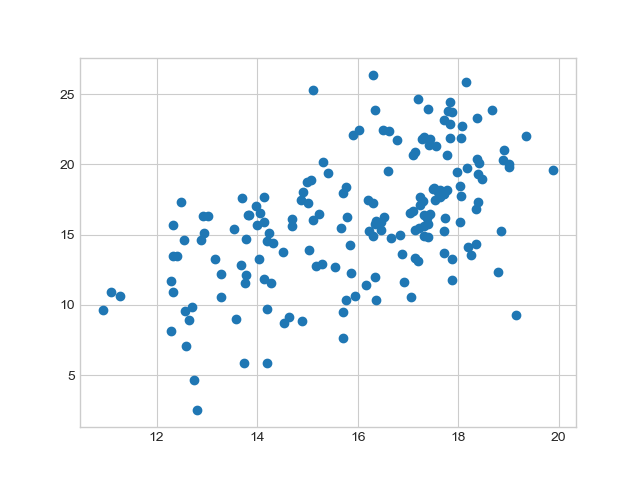

In [133]:
corr_nn_7, r2_nn_7 = get_correlation_and_r2(gt_7, preds_7, mae_avrg_val_f_7)

print(corr_nn_7, r2_nn_7, len(preds_7[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_7, gt_7)
#ca.set_xlim(10, 50)
#ca.set_ylim(5, 45)

In [139]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.004, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_6, mae_avrg_f_6, mae_avrg_val_f_6, gt_6, preds_6 = evaluate_model(model_f, 
                                                                          patients_xy[6]['x'], 
                                                                          patients_xy[6]['y'], 
                                                                          splitter, 1000)

Train data shape:(164, 5), Test data shape:(69, 5)
Train on 164 samples, validate on 69 samples
Epoch 1/1000
164/164 [==============================] - 1s 6ms/step - loss: 106.3447 - mean_absolute_error: 9.0166 - val_loss: 95.7338 - val_mean_absolute_error: 8.1120
Epoch 2/1000
164/164 [==============================] - 0s 3ms/step - loss: 95.9728 - mean_absolute_error: 8.4760 - val_loss: 86.2823 - val_mean_absolute_error: 7.5670
Epoch 3/1000
164/164 [==============================] - 0s 2ms/step - loss: 86.5469 - mean_absolute_error: 7.9510 - val_loss: 78.2644 - val_mean_absolute_error: 7.0635
Epoch 4/1000
164/164 [==============================] - 0s 1ms/step - loss: 77.3412 - mean_absolute_error: 7.4392 - val_loss: 70.7141 - val_mean_absolute_error: 6.5697
Epoch 5/1000
164/164 [==============================] - 0s 2ms/step - loss: 69.5250 - mean_absolute_error: 6.9349 - val_loss: 63.8170 - val_mean_absolute_error: 6.0913
Epoch 6/1000
164/164 [==============================] - 0s 1ms/

Epoch 49/1000
164/164 [==============================] - 0s 1ms/step - loss: 19.7732 - mean_absolute_error: 3.4193 - val_loss: 26.1169 - val_mean_absolute_error: 3.8289
Epoch 50/1000
164/164 [==============================] - 0s 1ms/step - loss: 20.2488 - mean_absolute_error: 3.4674 - val_loss: 26.0672 - val_mean_absolute_error: 3.8269
Epoch 51/1000
164/164 [==============================] - 0s 1ms/step - loss: 20.4785 - mean_absolute_error: 3.5249 - val_loss: 26.0210 - val_mean_absolute_error: 3.8242
Epoch 52/1000
164/164 [==============================] - 0s 1ms/step - loss: 21.6875 - mean_absolute_error: 3.5737 - val_loss: 25.9831 - val_mean_absolute_error: 3.8223
Epoch 53/1000
164/164 [==============================] - 0s 2ms/step - loss: 20.4176 - mean_absolute_error: 3.5385 - val_loss: 25.9490 - val_mean_absolute_error: 3.8205
Epoch 54/1000
164/164 [==============================] - 0s 2ms/step - loss: 20.6024 - mean_absolute_error: 3.5406 - val_loss: 25.9089 - val_mean_absolute_

164/164 [==============================] - 0s 2ms/step - loss: 18.5452 - mean_absolute_error: 3.3724 - val_loss: 24.4175 - val_mean_absolute_error: 3.7438
Epoch 146/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.7812 - mean_absolute_error: 3.4150 - val_loss: 24.4060 - val_mean_absolute_error: 3.7432
Epoch 147/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2151 - mean_absolute_error: 3.4437 - val_loss: 24.3955 - val_mean_absolute_error: 3.7430
Epoch 148/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.7695 - mean_absolute_error: 3.4504 - val_loss: 24.3911 - val_mean_absolute_error: 3.7430
Epoch 149/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.3123 - mean_absolute_error: 3.5042 - val_loss: 24.3802 - val_mean_absolute_error: 3.7422
Epoch 150/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2421 - mean_absolute_error: 3.4131 - val_loss: 24.3690 - val_mean_absolute_error: 3.

Epoch 193/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.0126 - mean_absolute_error: 3.3087 - val_loss: 24.1410 - val_mean_absolute_error: 3.7367
Epoch 194/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.2457 - mean_absolute_error: 3.3954 - val_loss: 24.1424 - val_mean_absolute_error: 3.7373
Epoch 195/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6487 - mean_absolute_error: 3.4062 - val_loss: 24.1340 - val_mean_absolute_error: 3.7366
Epoch 196/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.7774 - mean_absolute_error: 3.4595 - val_loss: 24.1296 - val_mean_absolute_error: 3.7362
Epoch 197/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2791 - mean_absolute_error: 3.4676 - val_loss: 24.1205 - val_mean_absolute_error: 3.7357
Epoch 198/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.3036 - mean_absolute_error: 3.3813 - val_loss: 24.1173 - val_mean_abs

164/164 [==============================] - 0s 2ms/step - loss: 18.0073 - mean_absolute_error: 3.3690 - val_loss: 23.7464 - val_mean_absolute_error: 3.7244
Epoch 290/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.3825 - mean_absolute_error: 3.4457 - val_loss: 23.7412 - val_mean_absolute_error: 3.7238
Epoch 291/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8034 - mean_absolute_error: 3.4125 - val_loss: 23.7331 - val_mean_absolute_error: 3.7236
Epoch 292/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.0396 - mean_absolute_error: 3.3931 - val_loss: 23.7285 - val_mean_absolute_error: 3.7236
Epoch 293/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1029 - mean_absolute_error: 3.3377 - val_loss: 23.7204 - val_mean_absolute_error: 3.7232
Epoch 294/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3556 - mean_absolute_error: 3.3535 - val_loss: 23.7167 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 1ms/step - loss: 18.6698 - mean_absolute_error: 3.3886 - val_loss: 23.5728 - val_mean_absolute_error: 3.7174
Epoch 386/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.6697 - mean_absolute_error: 3.2798 - val_loss: 23.5701 - val_mean_absolute_error: 3.7174
Epoch 387/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8024 - mean_absolute_error: 3.4502 - val_loss: 23.5665 - val_mean_absolute_error: 3.7172
Epoch 388/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1342 - mean_absolute_error: 3.3376 - val_loss: 23.5659 - val_mean_absolute_error: 3.7173
Epoch 389/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.2194 - mean_absolute_error: 3.3495 - val_loss: 23.5646 - val_mean_absolute_error: 3.7174
Epoch 390/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.6722 - mean_absolute_error: 3.3222 - val_loss: 23.5637 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 2ms/step - loss: 18.0807 - mean_absolute_error: 3.3205 - val_loss: 23.5230 - val_mean_absolute_error: 3.7190
Epoch 482/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6292 - mean_absolute_error: 3.3933 - val_loss: 23.5193 - val_mean_absolute_error: 3.7187
Epoch 483/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2958 - mean_absolute_error: 3.4244 - val_loss: 23.5187 - val_mean_absolute_error: 3.7188
Epoch 484/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.4708 - mean_absolute_error: 3.2899 - val_loss: 23.5171 - val_mean_absolute_error: 3.7187
Epoch 485/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.8930 - mean_absolute_error: 3.3691 - val_loss: 23.5141 - val_mean_absolute_error: 3.7183
Epoch 486/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.8380 - mean_absolute_error: 3.3319 - val_loss: 23.5144 - val_mean_absolute_error: 3.

Epoch 577/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.6642 - mean_absolute_error: 3.3359 - val_loss: 23.4748 - val_mean_absolute_error: 3.7179
Epoch 578/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.6676 - mean_absolute_error: 3.3287 - val_loss: 23.4693 - val_mean_absolute_error: 3.7175
Epoch 579/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.7587 - mean_absolute_error: 3.3136 - val_loss: 23.4675 - val_mean_absolute_error: 3.7173
Epoch 580/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1565 - mean_absolute_error: 3.3673 - val_loss: 23.4703 - val_mean_absolute_error: 3.7176
Epoch 581/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6719 - mean_absolute_error: 3.3820 - val_loss: 23.4672 - val_mean_absolute_error: 3.7175
Epoch 582/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8787 - mean_absolute_error: 3.4189 - val_loss: 23.4658 - val_mean_abs

Epoch 673/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.3575 - mean_absolute_error: 3.3618 - val_loss: 23.4358 - val_mean_absolute_error: 3.7175
Epoch 674/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.7433 - mean_absolute_error: 3.3451 - val_loss: 23.4320 - val_mean_absolute_error: 3.7170
Epoch 675/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.6828 - mean_absolute_error: 3.3530 - val_loss: 23.4318 - val_mean_absolute_error: 3.7172
Epoch 676/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2109 - mean_absolute_error: 3.3357 - val_loss: 23.4339 - val_mean_absolute_error: 3.7177
Epoch 677/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.4623 - mean_absolute_error: 3.3878 - val_loss: 23.4329 - val_mean_absolute_error: 3.7175
Epoch 678/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2951 - mean_absolute_error: 3.3276 - val_loss: 23.4325 - val_mean_abs

164/164 [==============================] - 0s 2ms/step - loss: 18.1446 - mean_absolute_error: 3.3870 - val_loss: 23.4302 - val_mean_absolute_error: 3.7161
Epoch 770/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.5309 - mean_absolute_error: 3.4211 - val_loss: 23.4320 - val_mean_absolute_error: 3.7164
Epoch 771/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3243 - mean_absolute_error: 3.3948 - val_loss: 23.4298 - val_mean_absolute_error: 3.7163
Epoch 772/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3346 - mean_absolute_error: 3.3849 - val_loss: 23.4300 - val_mean_absolute_error: 3.7163
Epoch 773/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.2061 - mean_absolute_error: 3.3558 - val_loss: 23.4284 - val_mean_absolute_error: 3.7161
Epoch 774/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.9765 - mean_absolute_error: 3.3499 - val_loss: 23.4303 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 2ms/step - loss: 18.1540 - mean_absolute_error: 3.3413 - val_loss: 23.4165 - val_mean_absolute_error: 3.7167
Epoch 866/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1239 - mean_absolute_error: 3.3464 - val_loss: 23.4183 - val_mean_absolute_error: 3.7170
Epoch 867/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2654 - mean_absolute_error: 3.3327 - val_loss: 23.4173 - val_mean_absolute_error: 3.7170
Epoch 868/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.6164 - mean_absolute_error: 3.3140 - val_loss: 23.4172 - val_mean_absolute_error: 3.7172
Epoch 869/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.3470 - mean_absolute_error: 3.2871 - val_loss: 23.4145 - val_mean_absolute_error: 3.7169
Epoch 870/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.0658 - mean_absolute_error: 3.4493 - val_loss: 23.4144 - val_mean_absolute_error: 3.

Epoch 961/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.5576 - mean_absolute_error: 3.3359 - val_loss: 23.4159 - val_mean_absolute_error: 3.7204
Epoch 962/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.1786 - mean_absolute_error: 3.4100 - val_loss: 23.4154 - val_mean_absolute_error: 3.7202
Epoch 963/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2707 - mean_absolute_error: 3.3809 - val_loss: 23.4121 - val_mean_absolute_error: 3.7201
Epoch 964/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1800 - mean_absolute_error: 3.3773 - val_loss: 23.4068 - val_mean_absolute_error: 3.7192
Epoch 965/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.2079 - mean_absolute_error: 3.2924 - val_loss: 23.4073 - val_mean_absolute_error: 3.7192
Epoch 966/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.8725 - mean_absolute_error: 3.3294 - val_loss: 23.4064 - val_mean_abs

          0         0
0  1.000000  0.469512
0  0.469512  1.000000 0.21405108616189905 69


<IPython.core.display.Javascript object>


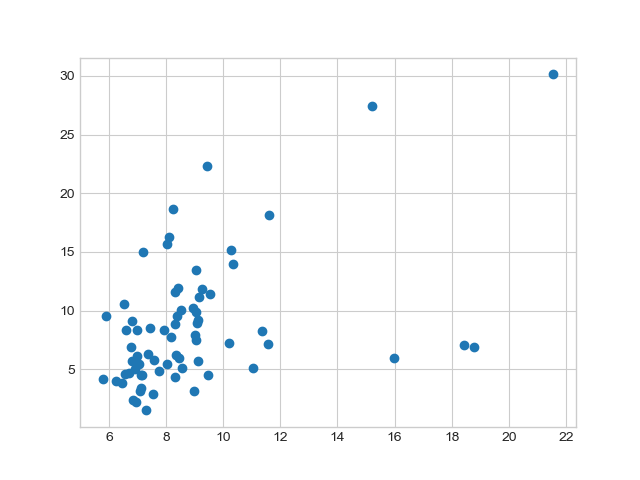

In [141]:
corr_nn_6, r2_nn_6 = get_correlation_and_r2(gt_6, preds_6, mae_avrg_val_f_6)

print(corr_nn_6, r2_nn_6, len(preds_6[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_6, gt_6)
#ca.set_xlim(10, 50)

#ca.set_ylim(5, 45)

<IPython.core.display.Javascript object>


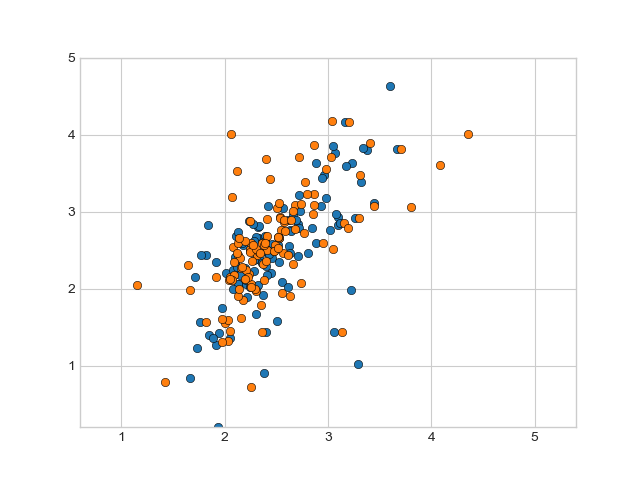

(0.2, 5.0)

In [142]:
less_mae_idx = np.argmin(mae_1)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_1)/10, np.array(gt_1)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_1[less_mae_idx]/10, ground_truth_1[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.6, 5.4)
ca.set_ylim(0.2, 5.0)

<IPython.core.display.Javascript object>


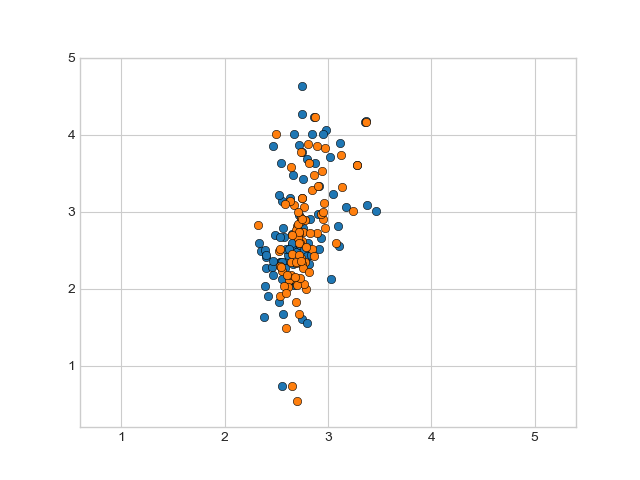

(0.2, 5.0)

In [382]:
less_mae_idx = np.argmin(mae_1)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_1)/10, np.array(gt_1)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_1[less_mae_idx]/10, ground_truth_1[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.6, 5.4)
ca.set_ylim(0.2, 5.0)

<IPython.core.display.Javascript object>


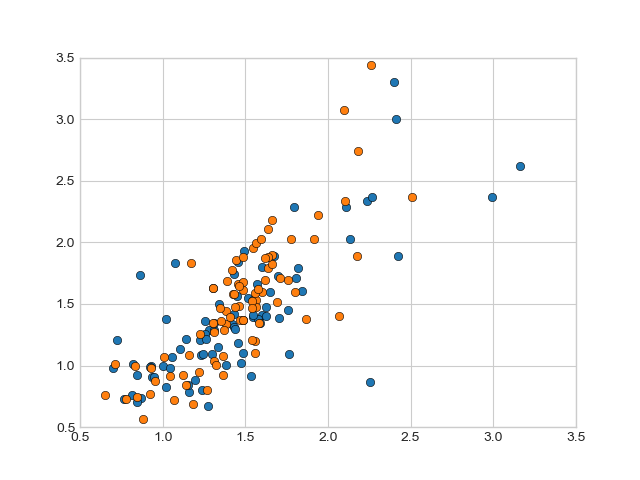

(0.5, 3.5)

In [143]:
less_mae_idx = np.argmin(mae_4)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_4)/10, np.array(gt_4)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_4[less_mae_idx]/10, ground_truth_4[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.5, 3.5)
ca.set_ylim(0.5, 3.5)

<IPython.core.display.Javascript object>


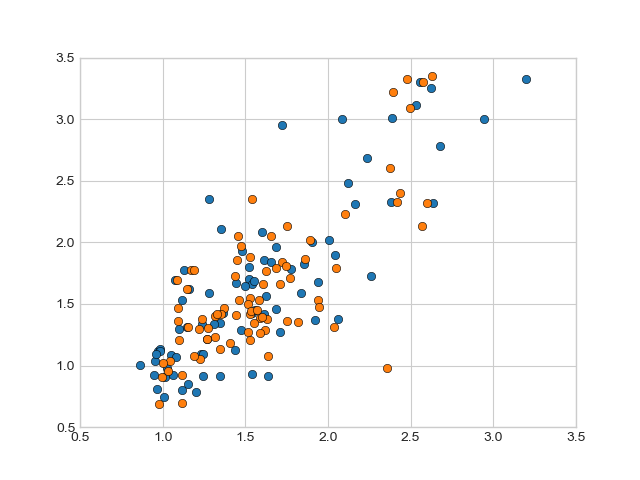

(0.5, 3.5)

In [386]:
less_mae_idx = np.argmin(mae_4)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_4)/10, np.array(gt_4)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_4[less_mae_idx]/10, ground_truth_4[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.5, 3.5)
ca.set_ylim(0.5, 3.5)

<IPython.core.display.Javascript object>


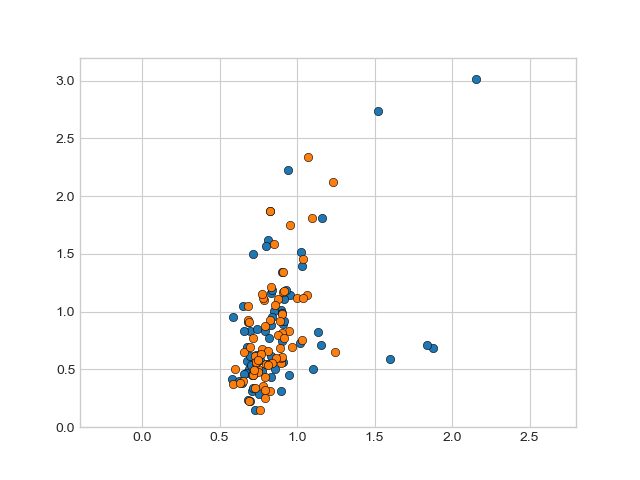

(0, 3.2)

In [144]:
less_mae_idx = np.argmin(mae_6)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_6)/10, np.array(gt_6)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_6[less_mae_idx]/10, ground_truth_6[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(-0.4, 2.8)
ca.set_ylim(0, 3.2)

<IPython.core.display.Javascript object>


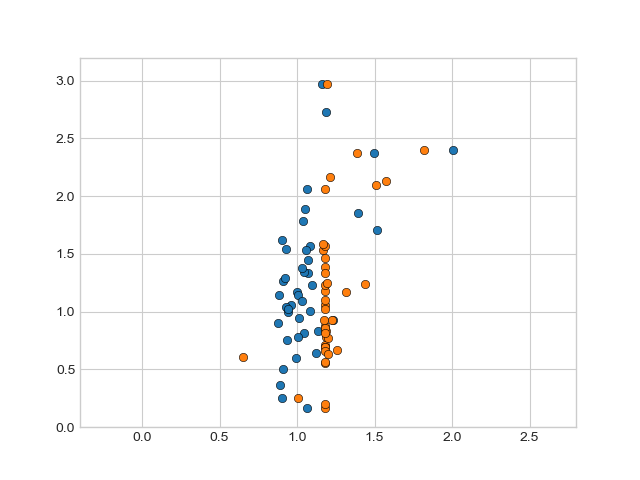

(0, 3.2)

In [393]:
less_mae_idx = np.argmin(mae_6)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_6)/10, np.array(gt_6)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_6[less_mae_idx]/10, ground_truth_6[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(-0.4, 2.8)
ca.set_ylim(0, 3.2)

<IPython.core.display.Javascript object>


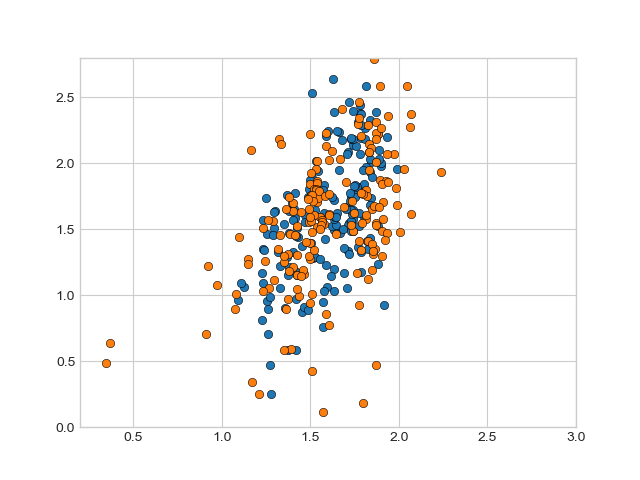

(0, 2.8)

In [145]:
less_mae_idx = np.argmin(mae_7)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_7)/10, np.array(gt_7)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_7[less_mae_idx]/10, ground_truth_7[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.2, 3)
ca.set_ylim(0, 2.8)

<IPython.core.display.Javascript object>


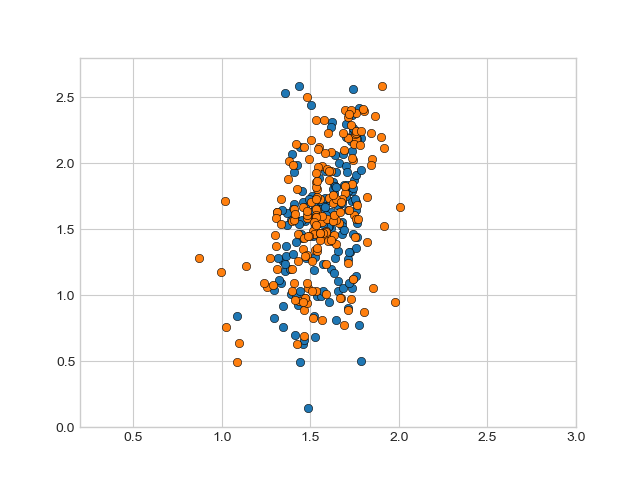

(0, 2.8)

In [397]:
less_mae_idx = np.argmin(mae_7)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_7)/10, np.array(gt_7)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_7[less_mae_idx]/10, ground_truth_7[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.2, 3)
ca.set_ylim(0, 2.8)

In [363]:
len(preds_1[0]), len(pred_1[0])

(85, 85)